In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import pandas as pd
import json
import cv2
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle
#sns.set(style='darkgrid')
sns.set(style='darkgrid', context='notebook',font_scale=1.5)

In [3]:
%autoreload
from scripts.loader import *
import mytools as tl

## Carga de datos

In [4]:
data_path = os.path.join('..', 'Datasets', 'Interiors')
resp_path = os.path.join(data_path, 'responses')
subj_path = os.path.join(data_path, 'human_scanpaths')
figs_path = os.path.join(os.getcwd(), 'figs')

In [5]:
subjs = load_human_scanpaths(subj_path, 'all')

In [6]:
responses = pd.read_csv(os.path.join(resp_path, 'responses_data.csv')).set_index(['subj_id','image'])
responses.loc[22,'grayscale_11_opensource.jpg']

subj                          fac
response_y                    829
response_x                   1119
response_size                  11
response_time_click      2.366613
response_time_circle    24.016633
Name: (22, grayscale_11_opensource.jpg), dtype: object

In [7]:
trials_data = load_trials_properties(os.path.join(subj_path,'..', 'trials_properties.json'))
trials_data = pd.DataFrame(trials_data).set_index('image')
trials_data.head()

target  \
image                                                                       
grayscale_1_housebeautiful.jpg  grayscale_1_housebeautiful_template_2.jpg   
grayscale_1_kitchen.jpg                grayscale_1_kitchen_template_1.jpg   
grayscale_1_oliva.jpg                    grayscale_1_oliva_template_1.jpg   
grayscale_1_opensource.jpg          grayscale_1_opensource_template_1.jpg   
grayscale_2_housebeautiful.jpg  grayscale_2_housebeautiful_template_3.jpg   

                                          dataset  target_matched_row  \
image                                                                   
grayscale_1_housebeautiful.jpg  Interiors Dataset                 155   
grayscale_1_kitchen.jpg         Interiors Dataset                 270   
grayscale_1_oliva.jpg           Interiors Dataset                 605   
grayscale_1_opensource.jpg      Interiors Dataset                 376   
grayscale_2_housebeautiful.jpg  Interiors Dataset                 499   

                                target_matched_column  target_height  \
image                                                                  
grayscale_1_housebeautiful.jpg                    130             72   
grayscale_1_kitchen.jpg                           855             72   
grayscale_1_oliva.jpg                             106             72   
grayscale_1_opensource.jpg                        700             72   
grayscale_2_housebeautiful.jpg                    447             72   

                                target_width  image_height  image_width  \
image                                                                     
grayscale_1_housebeautiful.jpg            72           768         1024   
grayscale_1_kitchen.jpg                   72           768         1024   
grayscale_1_oliva.jpg                     72           768         1024   
grayscale_1_opensource.jpg                72           768         1024   
grayscale_2_housebeautiful.jpg            72           768         1024   

                                initial_fixation_row  initial_fixation_column  \
image                                                                           
grayscale_1_housebeautiful.jpg                   113                      515   
grayscale_1_kitchen.jpg                          620                      718   
grayscale_1_oliva.jpg                            718                      492   
grayscale_1_opensource.jpg                       657                      997   
grayscale_2_housebeautiful.jpg                   471                      835   

                               target_object  
image                                         
grayscale_1_housebeautiful.jpg         clock  
grayscale_1_kitchen.jpg                 bowl  
grayscale_1_oliva.jpg                    cup  
grayscale_1_opensource.jpg               TBD  
grayscale_2_housebeautiful.jpg          bowl

## Agregar las respuestas y chequeo de datos

In [8]:
# algunos chequeos
tl.dimensions_check_scanpaths_dict(subj_path)

Dimesions are OK, X: columns/widht, Y: rows/heigth


In [9]:
save_path = os.path.join('..', 'Datasets', 'Interiors_Responses')

In [10]:
%autoreload
# CORRER SOLO UNA VEZ - funcion que agrega las respuestas y algunas variables extras al diccionario
# tl.add_responses(subj_path, responses_path=resp_path, save_path=save_path, change_scanpaths=True, calculate_features=False)

In [11]:
os.path.join(resp_path, 'human_scanpaths')

'../Datasets/Interiors/responses/human_scanpaths'

In [16]:
# carga de los sujetos con las respuestas almacenadas en un diccionario
subjs_response = load_human_scanpaths(os.path.join(resp_path, 'human_scanpaths'), human_subject='all')
subjs_response[1][list(subjs_response[1].keys())[0]]

{'subject': '01',
 'dataset': 'Interiors Dataset',
 'image_height': 768,
 'image_width': 1024,
 'screen_height': 960,
 'screen_width': 1280,
 'receptive_height': 32,
 'receptive_width': 32,
 'target_found': False,
 'target_bbox': [559, 228, 631, 300],
 'X': [623.5, 507.6, 367.4, 385.7, 656.6, 401.7, 349.8, 327.0],
 'Y': [758.9, 434.0, 338.6, 509.70000000000005, 407.4, 588.3, 557.3, 551.1],
 'T': [1449, 130, 244, 296, 396, 327, 360, 539],
 'target_object': 'TBD',
 'max_fixations': 13,
 'subject_name': 'AFR',
 'initial_fixation_row': 754,
 'initial_fixation_column': 585,
 'response_x': 226.0,
 'response_y': 495.0,
 'response_size': 17,
 'response_click': 9.40012257278431,
 'response_circle': 18.2170030085836,
 'distance_to_target': 106.97663296253066,
 'distance_to_last_fix': 115.53445373567143,
 'last_fix_dur': -1,
 'target_found_response': False,
 'delta_time_response': 8.81688043579929}

## Limpieza del dataframe
TODO: Esto podría pasarlo en el futuro a la función get_responses_features

In [17]:
# dataframe de relevancia para explorar las respuestas
responses_data = tl.get_responses_features(subjs_response)
responses_data.head()

subj                              img  max_fixations  scanpath_length  \
0    41      grayscale_11_opensource.jpg             13               10   
1    41  grayscale_18_housebeautiful.jpg              9               10   
2    41          grayscale_100_oliva.jpg              5                3   
3    41           grayscale_17_oliva.jpg              3                2   
4    41  grayscale_16_housebeautiful.jpg              3                4   

   target_found  target_found_response  response_size  distance_to_target  \
0         False                  False             29          266.810794   
1         False                  False             47          329.200547   
2          True                  False             19          202.054448   
3         False                  False             35          297.692795   
4         False                  False             19          568.198029   

   distance_to_last_fix  delta_time_response  response_x  response_y  \
0            213.164661            49.599536       486.0       447.0   
1            411.615026             9.666707       520.0       538.0   
2            204.544005             5.633140       714.0       218.0   
3            208.923431             4.266648       433.0       316.0   
4            223.650531             2.900187       762.0       442.0   

   target_bbox_x  target_bbox_y  response_target_relative_x  \
0            228            559                      -258.0   
1            797            400                       277.0   
2            713            381                        -1.0   
3            186            490                      -247.0   
4            158            421                      -604.0   

   response_target_relative_y  
0                       112.0  
1                      -138.0  
2                       163.0  
3                       174.0  
4                       -21.0

In [18]:
# Tiramos a los sujetos que contestaron afuera de la imagen
print('Sujetos con respuesta objetiva fuera del ancho:', responses_data[responses_data.response_x >= 1024].shape[0])
tiramos = responses_data[responses_data.response_x >= 1024][['subj','img']]
print(tiramos)
responses_data = responses_data[responses_data.response_x < 1024]
print('Sujetos con respuesta objetiva fuera del ancho:', responses_data[responses_data.response_y >= 768].shape[0])

Sujetos con respuesta objetiva fuera del ancho: 5
      subj                       img
818     20     grayscale_4_oliva.jpg
853     20    grayscale_61_oliva.jpg
862     20   grayscale_7_kitchen.jpg
912     20    grayscale_92_oliva.jpg
4187    25  grayscale_15_kitchen.jpg
Sujetos con respuesta objetiva fuera del ancho: 0


In [19]:
# vemos limites de la respuesta relativa
print('Width limits: ', responses_data['response_target_relative_x'].min(),
      responses_data['response_target_relative_x'].max())
print('Height limits: ',responses_data['response_target_relative_y'].min(),
      responses_data['response_target_relative_y'].max())

Width limits:  -1006.0 906.0
Height limits:  -578.0 582.0


In [20]:
# Veamos que paso con los que tienen 4 max_fix (probablemente los impute como 5)
print(responses_data[responses_data.max_fixations==4].shape[0])
print('Sujetos con este problema:', list(responses_data[responses_data.max_fixations==4].subj.unique())) 
if responses_data[responses_data.max_fixations==4].shape[0] > 0: responses_data[responses_data.max_fixations==4][['subj','img']].sample(5)

0
Sujetos con este problema: []


In [21]:
# SOLO POR AHORA VOY A CORREGIR SUPONIENDO QUE DEBERIA SER 5 FIJACIONES/4 SACADAS
#subjs[37]['grayscale_30_opensource.jpg']
#responses_data['max_fixations'] = responses_data['max_fixations'].replace(4, 5)

# Análisis exploratorio

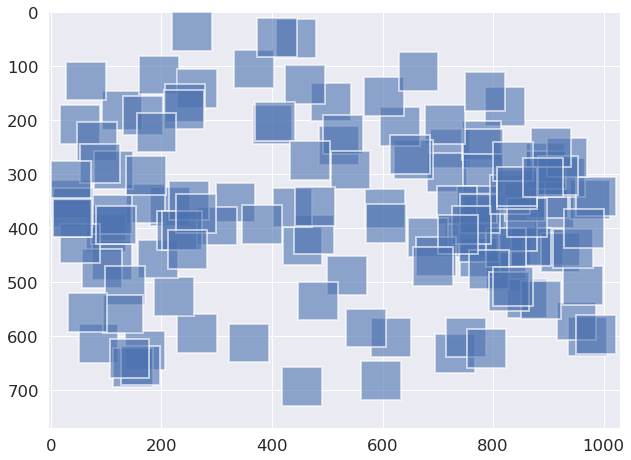

In [22]:
# todos los target boxes
target_boxes = dict()
for subj, value in subjs_response.items():
    for img, val in value.items():
        if img not in target_boxes.keys():
            target_boxes[img] = val['target_bbox'] #initial_fixation_row
target_boxes=pd.DataFrame(target_boxes).T
target_boxes.columns=['h1', 'w1', 'h2', 'w2']
target_boxes.head()

fig, ax1 = plt.subplots(1,1, figsize=(10.24,7.68))
for i, row in target_boxes.iterrows():
    ax1.add_patch(Rectangle((row.w1, row.h1), row.w2-row.w1, row.h2-row.h1, 
                           fill=True, linewidth=2, alpha=0.6))
ax1.set_xlim(-5,1024+5)
ax1.set_ylim(-3,768+3)
ax1.invert_yaxis()

134


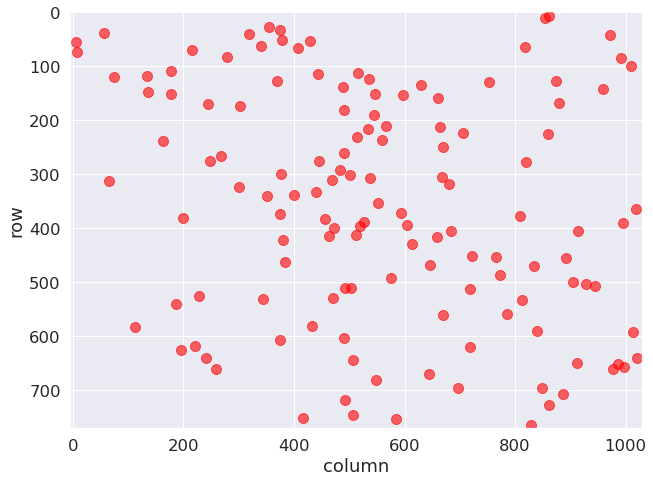

In [23]:
# todas las primeras fijaciones
first_forced_fix = dict()
for subj, value in subjs_response.items():
    for img, val in value.items():
        if img not in first_forced_fix.keys():
            first_forced_fix[img] = (val['initial_fixation_row'], val['initial_fixation_column'])  #initial_fixation_row
first_forced_fix=pd.DataFrame(first_forced_fix).T
first_forced_fix.columns=['row', 'column']
first_forced_fix.head()

fig, ax1 = plt.subplots(1,1, figsize=(10.24,7.68))
print(first_forced_fix.shape[0])
first_forced_fix.plot(x='column', y='row', ax=ax1, kind='scatter', c='red', s=100, alpha=0.6)
#f = first_forced_fix.plot.scatter(x='column', y='row', annontbackend='plotly')
#f.show()
ax1.set_xlim(-5,1024+5)
ax1.set_ylim(-3,768+3)
ax1.invert_yaxis()

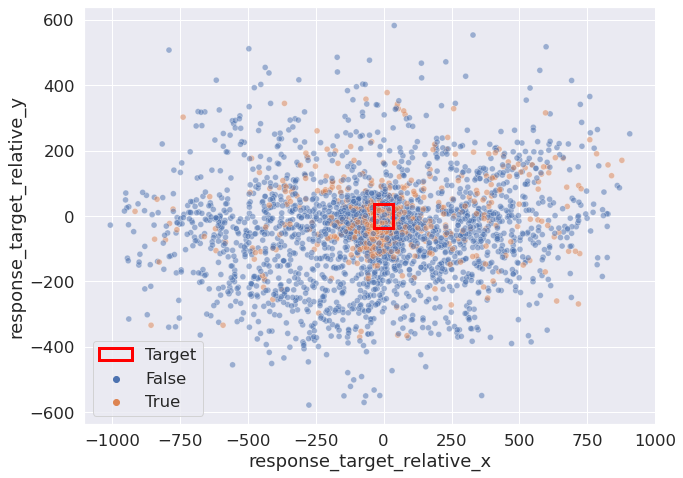

In [24]:
# all responses
fig, ax = plt.subplots(1,1, figsize=(10.24, 7.68))
sns.scatterplot(x='response_target_relative_x', y='response_target_relative_y',hue='target_found',
                data=responses_data, alpha=0.5, ax=ax);
ax.add_patch(Rectangle((-36,-36), 72, 72, fill=False, edgecolor='red', linewidth=3, label='Target'))
ax.legend();

(0.0, 400.0)

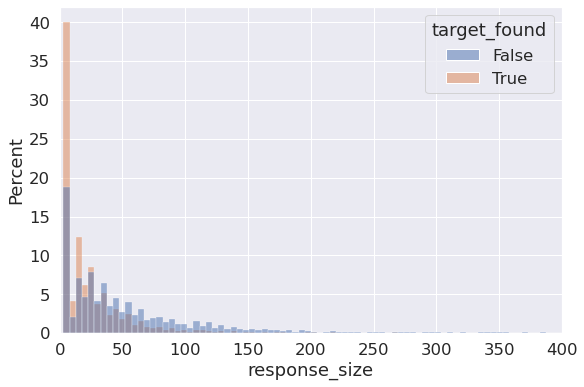

In [25]:
fig, ax = plt.subplots(1,1, figsize=(9,6))
sns.histplot(x='response_size', hue='target_found', data=responses_data, ax=ax, stat='percent', common_norm=False);
ax.set_xlim(0,400)

## Modelito lineal: distancia al target vs tamaño respuesta

(0.0, 400.0)

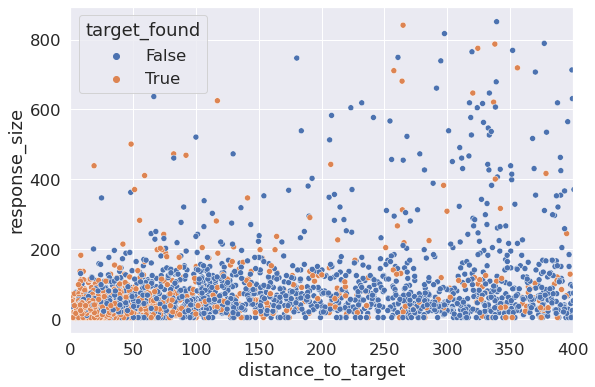

In [26]:
fig, ax = plt.subplots(1,1, figsize=(9,6))
sns.scatterplot(x='distance_to_target', y='response_size',hue='target_found', data=responses_data, ax=ax);
ax.set_xlim(0,400)

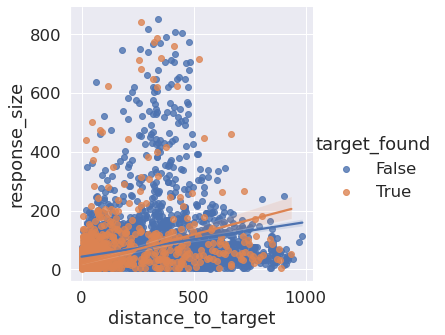

In [29]:
sns.lmplot(x='distance_to_target', y='response_size',hue='target_found', data=responses_data);

In [30]:
# response_size vs distance to target
import statsmodels.api as sm
X = sm.add_constant(responses_data['distance_to_target'].to_numpy())
y = responses_data['response_size'].to_numpy().reshape(-1,1)
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1019.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          2.11e-209
Time:                        14:14:10   Log-Likelihood:                -42306.
No. Observations:                7308   AIC:                         8.462e+04
Df Residuals:                    7306   BIC:                         8.463e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2327      1.115     25.315      0.0

(7304, 19)


/home/gastonb/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-1.0, 8.0)

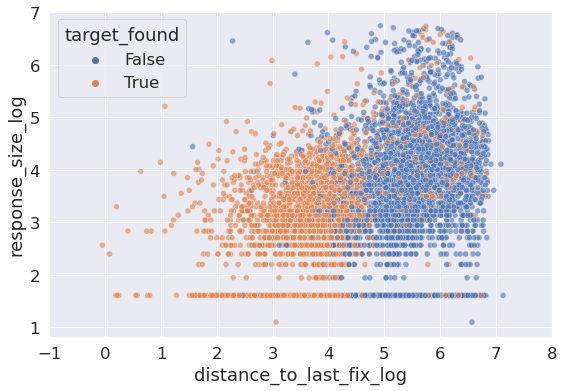

In [49]:
# auxiliar log
responses_data_aux = responses_data.copy()
responses_data_aux['distance_to_target_log'] = np.log(responses_data_aux['distance_to_target'])
responses_data_aux['response_size_log'] = np.log(responses_data_aux['response_size'])
responses_data_aux['distance_to_last_fix_log'] = np.log(responses_data_aux['distance_to_last_fix'])
responses_data_aux.replace(-np.Inf, np.nan,inplace=True)
responses_data_aux.dropna(inplace=True)
print(responses_data_aux.shape)
fig, ax = plt.subplots(1,1, figsize=(9,6))
sns.scatterplot(x='distance_to_last_fix_log', y='response_size_log',hue='target_found', data=responses_data_aux, ax=ax, alpha=0.6);
ax.set_xlim(-1,8)

In [50]:
X = sm.add_constant(responses_data_aux['distance_to_last_fix_log'].to_numpy())
y = responses_data_aux['response_size_log'].to_numpy().reshape(-1,1)
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     1810.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:09   Log-Likelihood:                -10967.
No. Observations:                7304   AIC:                         2.194e+04
Df Residuals:                    7302   BIC:                         2.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9680      0.052     18.758      0.0

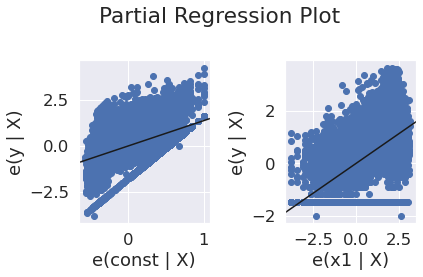

In [36]:
fig = sm.graphics.plot_partregress_grid(res)
fig.tight_layout()

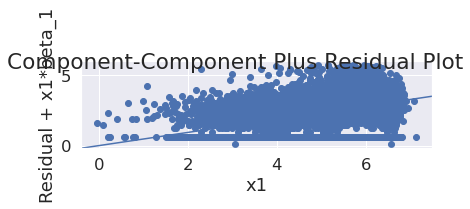

In [56]:
fig = sm.graphics.plot_ccpr_grid(res)

## Volvemos a los analisis

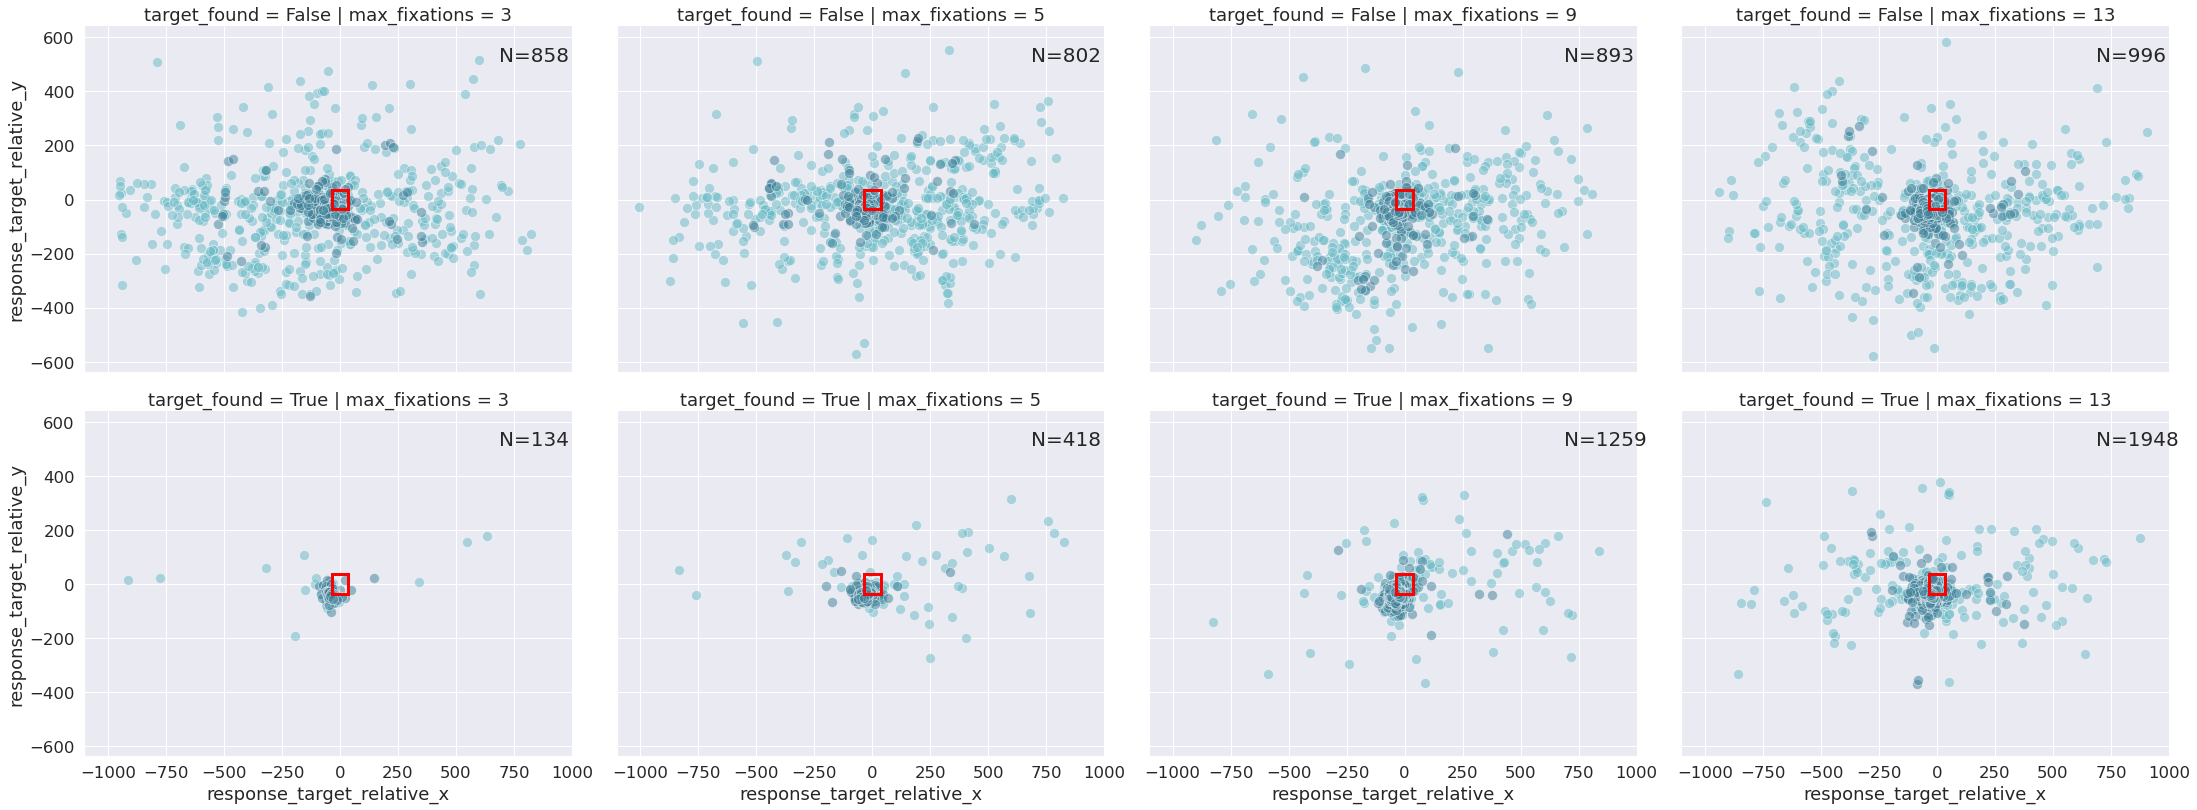

In [57]:
def add_target_patch(**kws):
    ax = plt.gca()
    ax.add_patch(Rectangle((-36,-36), 72, 72, fill=False, edgecolor='red', linewidth=3, label='Target'))

def add_amount_trials(**kws):
    ax = plt.gca()
    data = kws.pop('data')
    n = data.groupby(['target_found', 'max_fixations']).count().subj
    ax.text(f'{n}')
                
grid = sns.FacetGrid(responses_data, row="target_found",col="max_fixations", hue="target_found_response", 
                    palette="GnBu_d", height=5.8, aspect=1.33)

grid.map(sns.scatterplot, "response_target_relative_x", "response_target_relative_y", alpha=0.5, s=100);
#grid.map(plt.add_patch(Rectangle((-36,-36), 72, 72, fill=False, edgecolor='red', linewidth=3, label='Target')))
grid.map_dataframe(add_target_patch)
ntrials = responses_data.groupby(['target_found', 'max_fixations']).count().subj
for ax, ((_,_), n) in zip(grid.axes.ravel(), ntrials.iteritems()):
    ax.annotate(f'N={n}',xy=(0.85,0.9), xycoords ='axes fraction', fontsize=20)
grid.tight_layout()



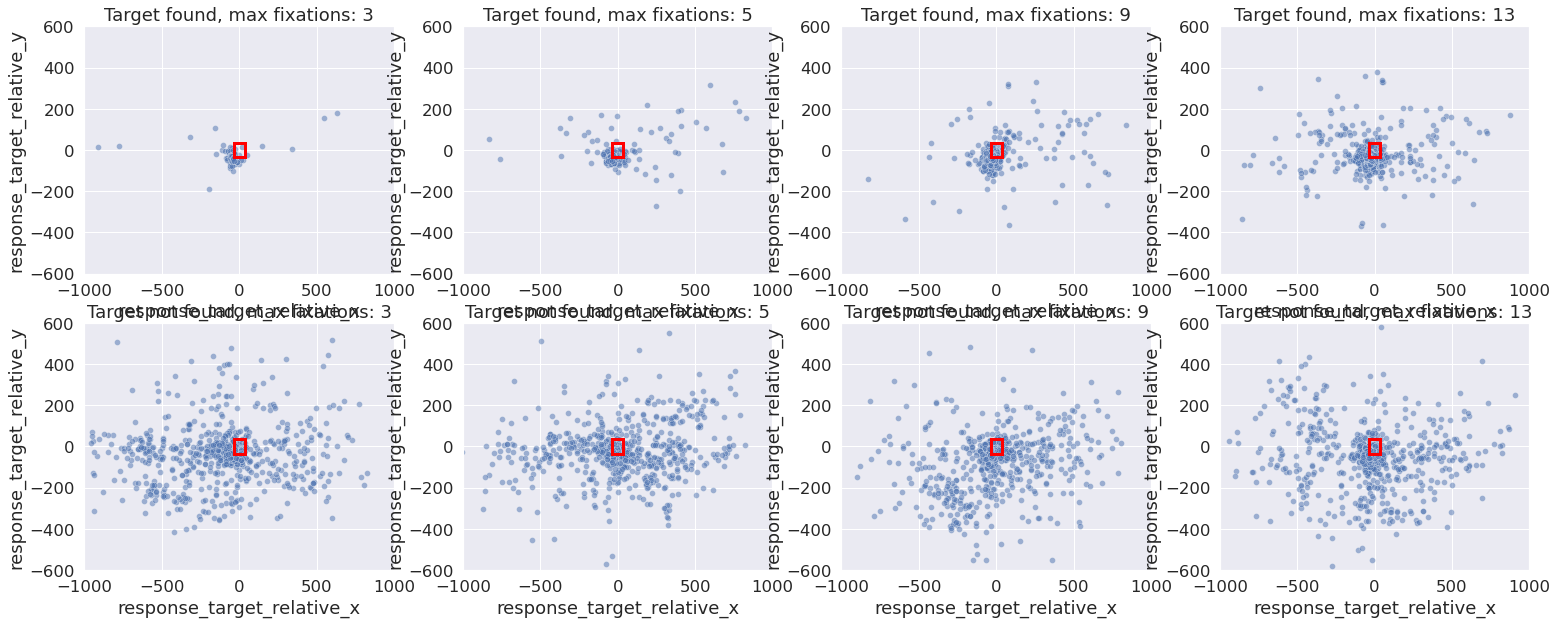

In [58]:
# separar segun la cantidad de fijaciones que hicieron y si encontraron o no el objetivo

_, ax = plt.subplots(2,4, figsize=(26, 10))

thr_vals = [3,5,9,13]

for i, thr in enumerate(thr_vals):
    sns.scatterplot(x='response_target_relative_x', y='response_target_relative_y', 
                    data=responses_data[(responses_data.target_found) & (responses_data.max_fixations==thr)], alpha=0.5, ax=ax[0,i]);
    ax[0,i].add_patch(Rectangle((-36,-36), 72, 72, fill=False, edgecolor='red', linewidth=3, label='Target'))
    ax[0,i].set_title('Target found, max fixations: {}'.format(thr))
    ax[0,i].set_aspect(1.33)
    ax[0,i].set_xlim(-1000,1000)
    ax[0,i].set_ylim(-600,600)
    
for i, thr in enumerate(thr_vals):
    sns.scatterplot(x='response_target_relative_x', y='response_target_relative_y',
                    data=responses_data[(~responses_data.target_found) & (responses_data.max_fixations==thr)], alpha=0.5, ax=ax[1,i]);
    ax[1,i].add_patch(Rectangle((-36,-36), 72, 72, fill=False, edgecolor='red', linewidth=3, label='Target'))
    ax[1,i].set_title('Target not found, max fixations: {}'.format(thr))
    ax[1,i].set_aspect(1.33)
    ax[1,i].set_xlim(-1000,1000)
    ax[1,i].set_ylim(-600,600)
    

In [40]:
# all responses - TAKES LONG
if False:
    fig, ax = plt.subplots(1,2,figsize=(15,10))
    n_found , n_not_found = 0, 0
    for idx, row in responses_data.iterrows():
        rx = row.response_target_relative_x
        ry = row.response_target_relative_y
        r = row.response_size
        if row.target_found:
            ax[0].add_patch(Circle((rx,ry), r, fill=True, edgecolor='blue', linewidth=3, alpha=0.05))
            n_found += 1
        else:
            ax[1].add_patch(Circle((rx,ry), r, fill=True, facecolor='red', edgecolor='red', linewidth=3, alpha=0.01))
            n_not_found += 1
            
    ax[0].set_xlim(-1000, 1000)
    ax[0].set_ylim(-600, 600)
    ax[0].set_aspect(1024/768)
    ax[0].set_title(f'Found: {n_found}')
    ax[1].set_xlim(-1000, 1000)
    ax[1].set_ylim(-600, 600)
    ax[1].set_aspect(1024/768)
    ax[1].set_title(f'Not found: {n_not_found}')

In [59]:
%autoreload
import mytools as tl

subj = 41
image_name = 'grayscale_100_oliva.jpg' 
print(subjs_response[subj][image_name]['initial_fixation_row'])
print(subjs_response[subj][image_name]['initial_fixation_column'])

339
400


In [60]:
def filter_dict(data_dict, val_target = True, val_max_fix = 0):
    final_dict = dict()
    # Iterate over all the items in dictionary and filter items which has even keys
    for (subj, value) in data_dict.items():
    # Check if key is even then add pair to new dictionary
        newDict = dict()
        for (im, val) in value.items():
            if (val['target_found'] == val_target) & (val_max_fix ==0):
                newDict.update({im: val})
            elif (val['target_found'] == val_target) & (val['max_fixations']== val_max_fix):
                newDict.update({im: val})
        final_dict.update({subj:newDict})
    return final_dict

lista_found = [filter_dict(subjs_response, True, i) for i in [3,5,9,13]]
lista_not_found = [filter_dict(subjs_response, False, i) for i in [3,5,9,13]]
subjs_response_found = filter_dict(subjs_response, True, 0)

## Mapas de calor

In [61]:
# dataframe con los scanpaths
%autoreload
import mytools as tl
sdf = tl.create_scanpaths_df(subjs_response, use_response=False)
display(sdf.head()), sdf.shape

subj                          img  fix_order      x      y    t  \
0    41  grayscale_11_opensource.jpg          0  693.9  595.4  123   
1    41  grayscale_11_opensource.jpg          1  446.6  485.5  382   
2    41  grayscale_11_opensource.jpg          2  434.2  377.4  322   
3    41  grayscale_11_opensource.jpg          3  682.8  473.9  175   
4    41  grayscale_11_opensource.jpg          4  565.7  462.0  176   

   target_found  
0         False  
1         False  
2         False  
3         False  
4         False

(None, (43346, 7))

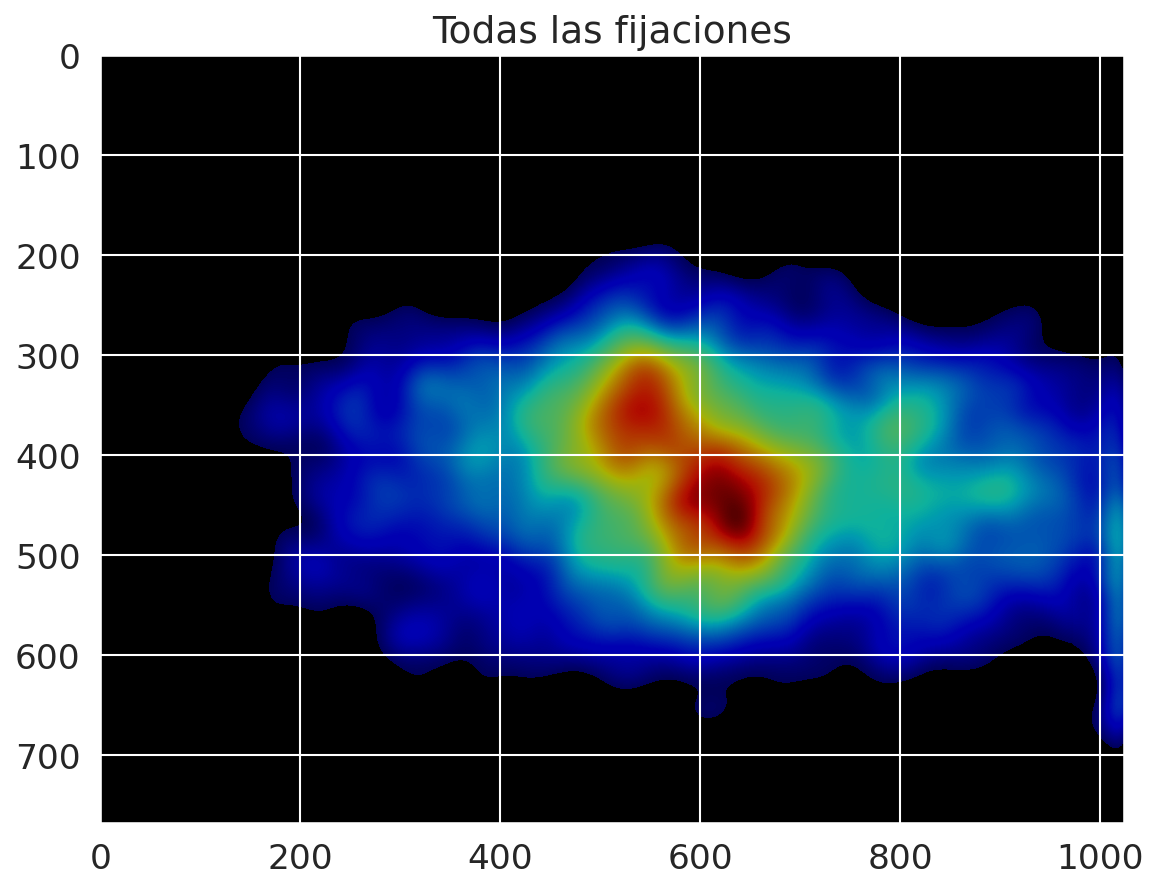

In [62]:
%autoreload
from gazeheatpoints import draw_heatmap

# heatmap de todas las fijaciones
_, hm = draw_heatmap(sdf.loc[:,['x', 'y']], alpha=0.7, title = 'Todas las fijaciones',savefigpath=figs_path)

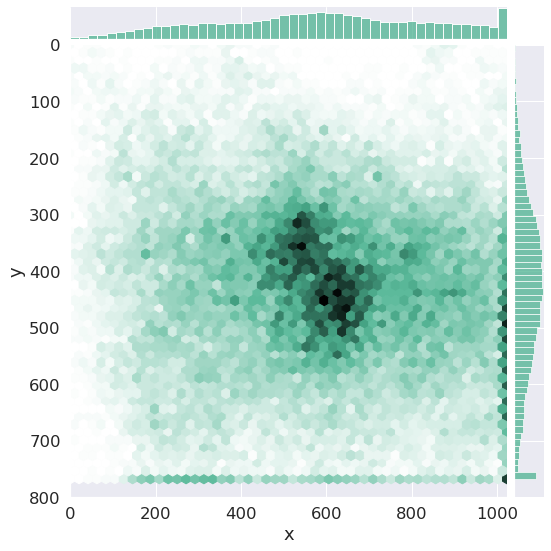

In [45]:
# scatterplot de todas las fijaciones para ver que esta pasando
g = sns.jointplot(x='x', y='y', kind="hex", data=sdf, color="#4CB391", height=8, ratio=12,
                    xlim=(0,1024), ylim=(0,800));
g.fig.axes[0].invert_yaxis()
plt.savefig(path.join(figs_path, f'scatter_all_fix.png'))

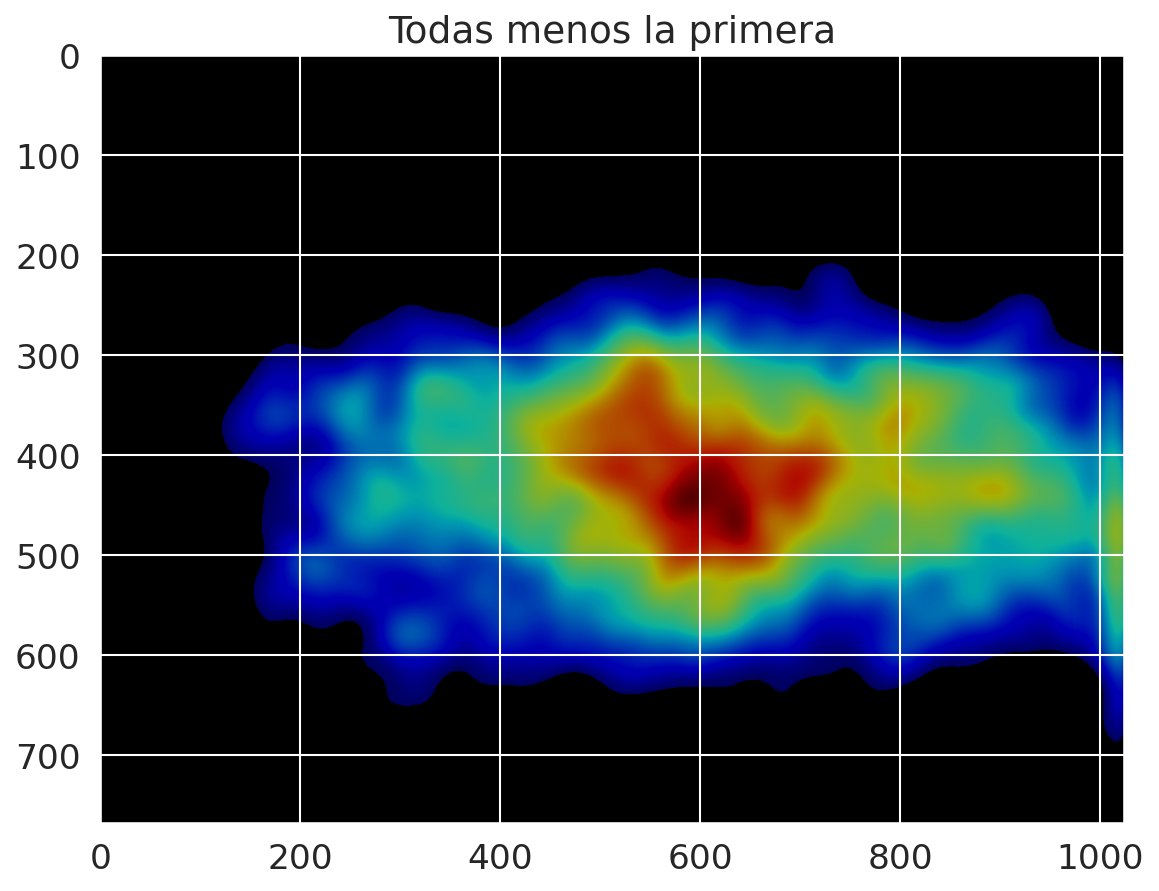

In [46]:
# heatmap de todas las fijaciones menos la primera
aux = sdf[sdf.fix_order!=0].loc[:,['x','y']]
_, hm = draw_heatmap(aux, alpha = 0.7, title = 'Todas menos la primera',savefigpath=figs_path)

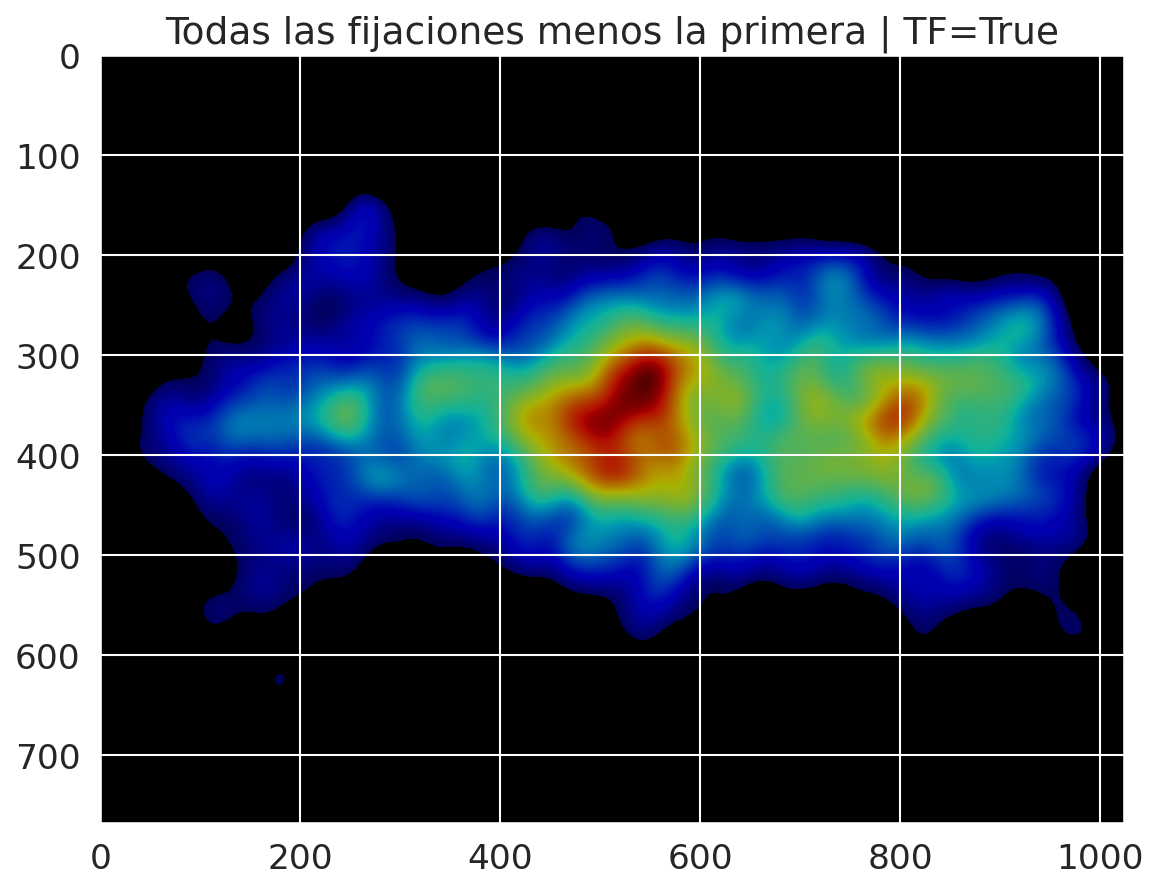

In [47]:
# heatmap de todos los target found menos la primera fijacion
aux = sdf[(sdf.target_found) & (sdf.fix_order!=0)].loc[:,['x','y']]
_, hm = draw_heatmap(aux, alpha=0.7, title='Todas las fijaciones menos la primera | TF=True', savefigpath=figs_path)

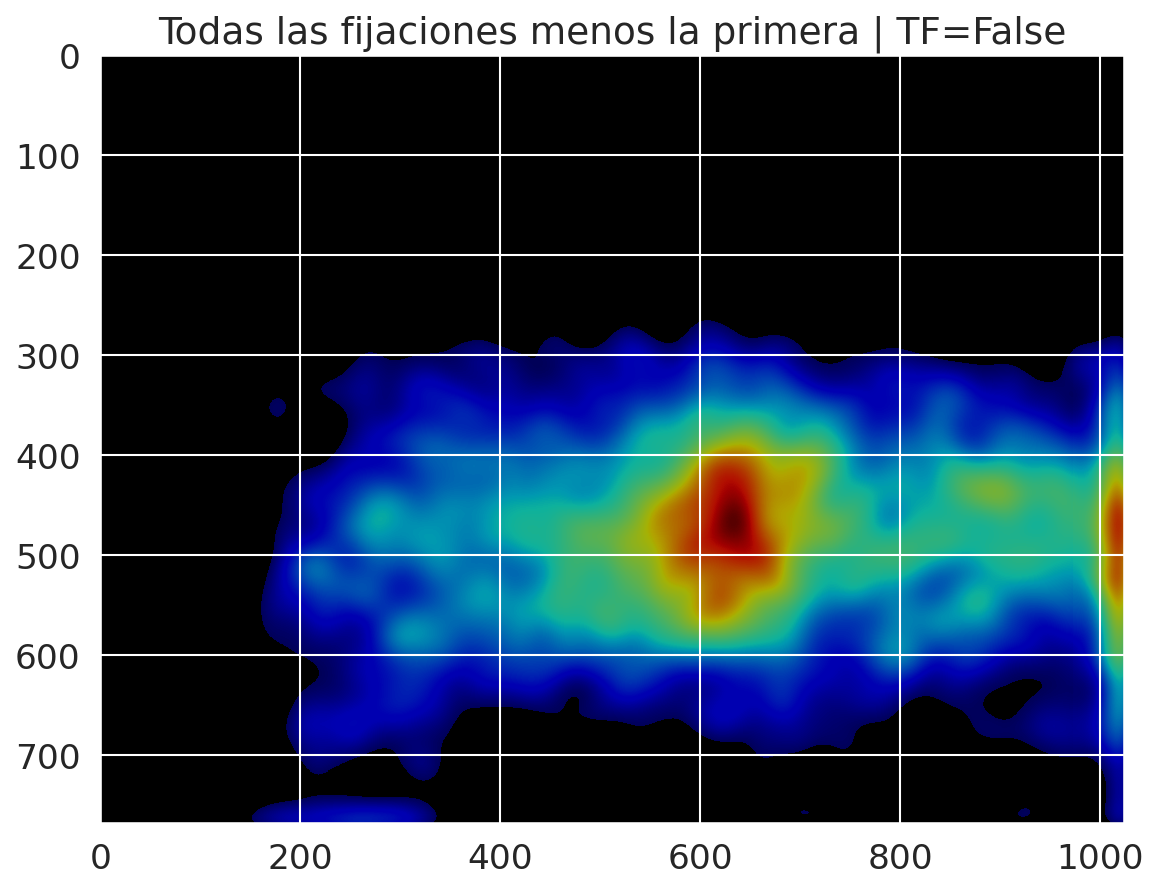

In [48]:
aux = sdf[~(sdf.target_found) & (sdf.fix_order!=0)].loc[:,['x','y']]
_, hm = draw_heatmap(aux, alpha=0.7, title='Todas las fijaciones menos la primera | TF=False', savefigpath=figs_path)

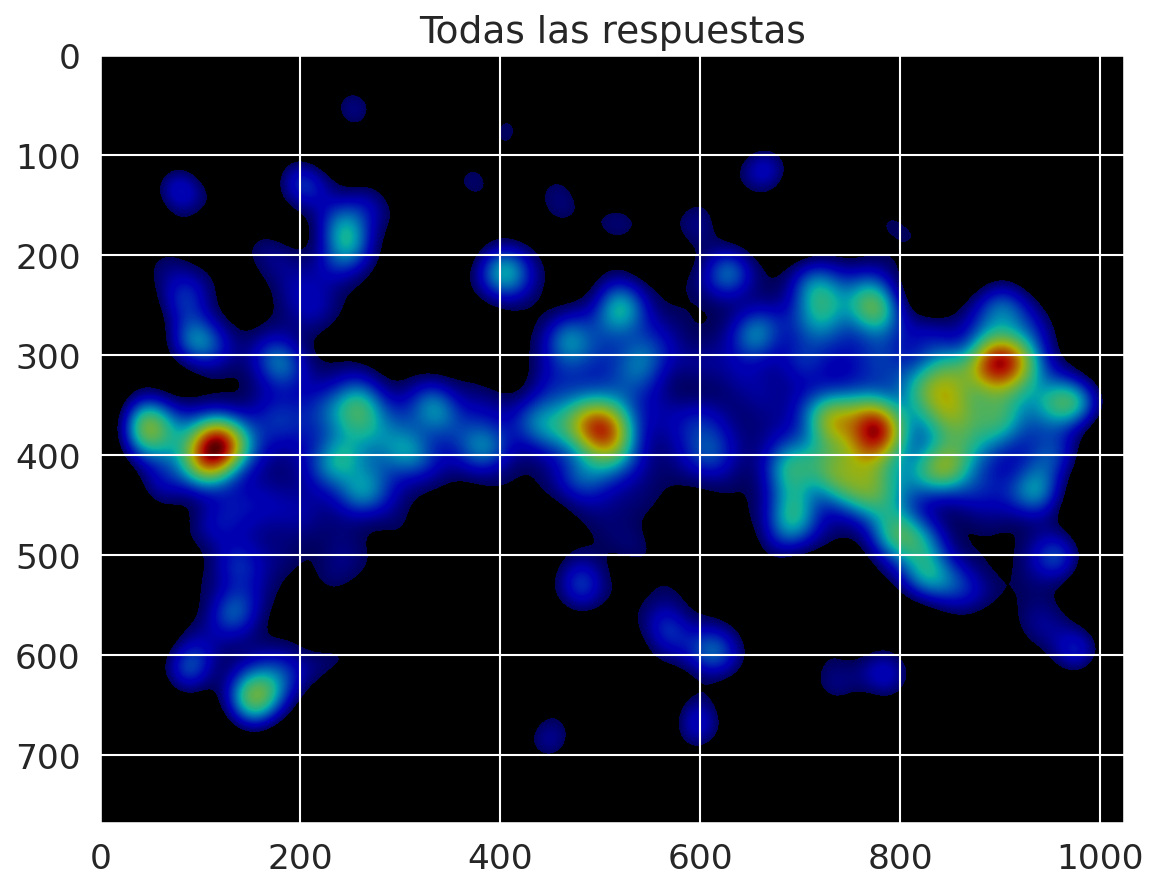

In [49]:
# distribución de las respuestas
sdf_r = tl.create_scanpaths_df(subjs_response, use_response='True')
aux = sdf_r[sdf_r.fix_order=='r'].loc[:,['x','y']]
_, hm = draw_heatmap(aux, alpha = 0.7, title = 'Todas las respuestas', savefigpath=figs_path)

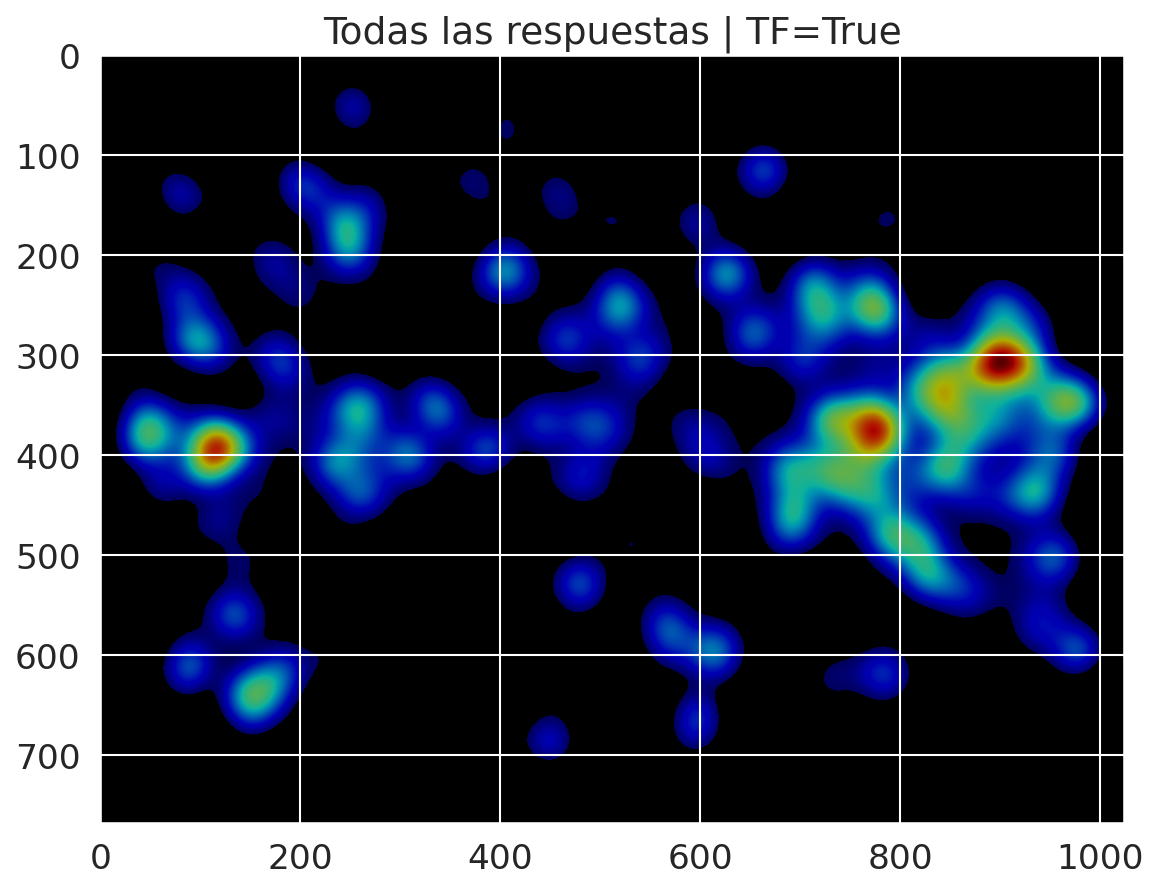

In [50]:
# todas las respuestas target found
aux = sdf_r[(sdf_r.fix_order=='r') & (sdf_r.target_found)].loc[:,['x','y']]
_, hm = draw_heatmap(aux, alpha = 0.7, title = 'Todas las respuestas | TF=True',savefigpath=figs_path)

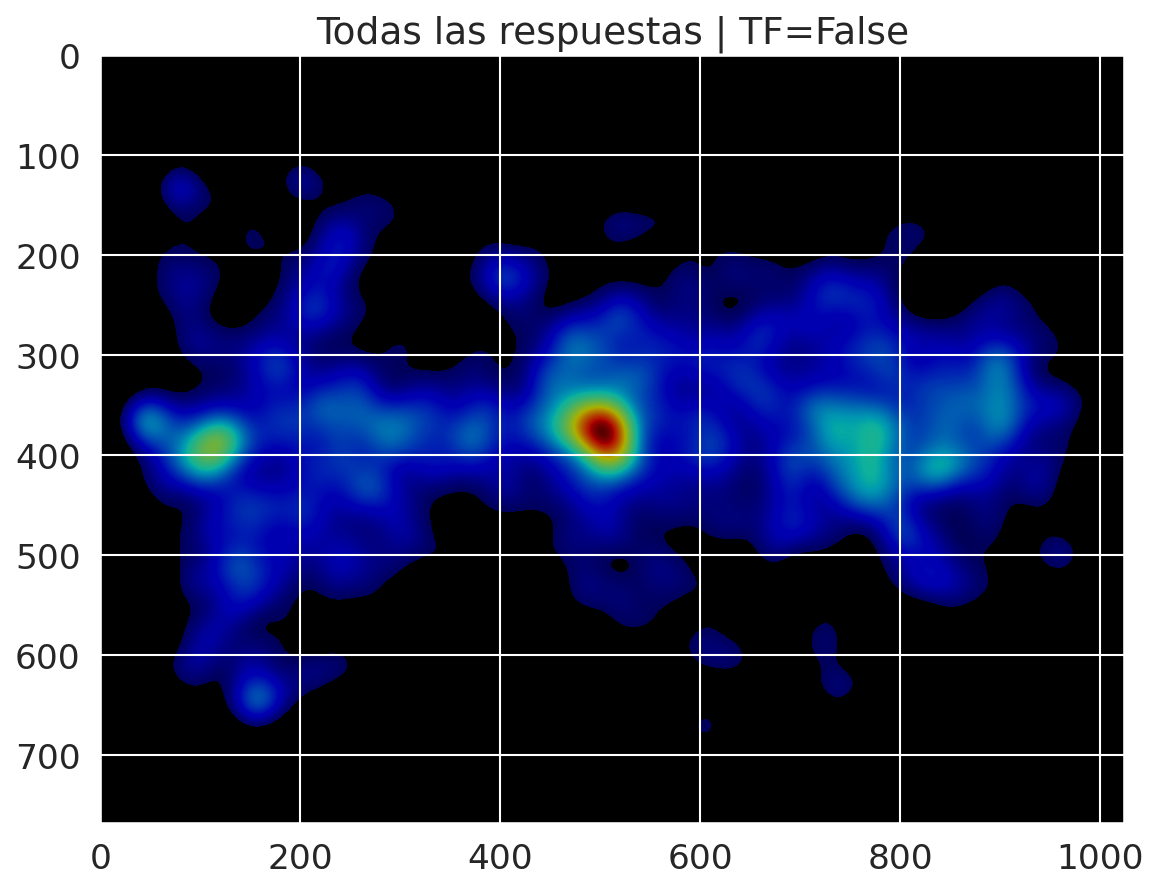

In [51]:
# todas las respuestas target not found
aux = sdf_r[(sdf_r.fix_order=='r') & ~(sdf_r.target_found)].loc[:,['x','y']]
_, hm = draw_heatmap(aux, alpha = 0.7, title = 'Todas las respuestas | TF=False',savefigpath=figs_path)

## Distribución de fijaciones de acuerdo a las respuestas

In [63]:
subj = 41
#image_name = 'grayscale_100_oliva.jpg' 
#image_name='grayscale_11_opensource.jpg'
image_name='grayscale_30_opensource.jpg'
subjs[subj][image_name]['target_bbox'][:2]
#_ = tl.plot_fixposmap(subjs_response_found, image_file=image_name, 
#           image_path = os.path.join(data_path,'images'), plot_save_path=None)

[240, 800]

(<Figure size 1080x720 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

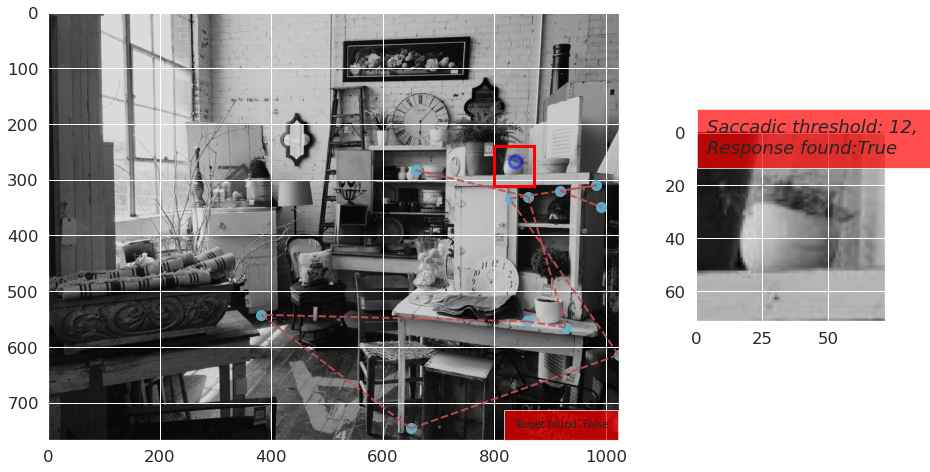

In [68]:
%autoreload
import mytools as tl
tl.plot_trial_subject_response(subj=15, 
                               image_name=image_name,
                               data_path=data_path,
                               resp_path=resp_path,
                               y_correction = False,
                               show_scanpath=True)

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

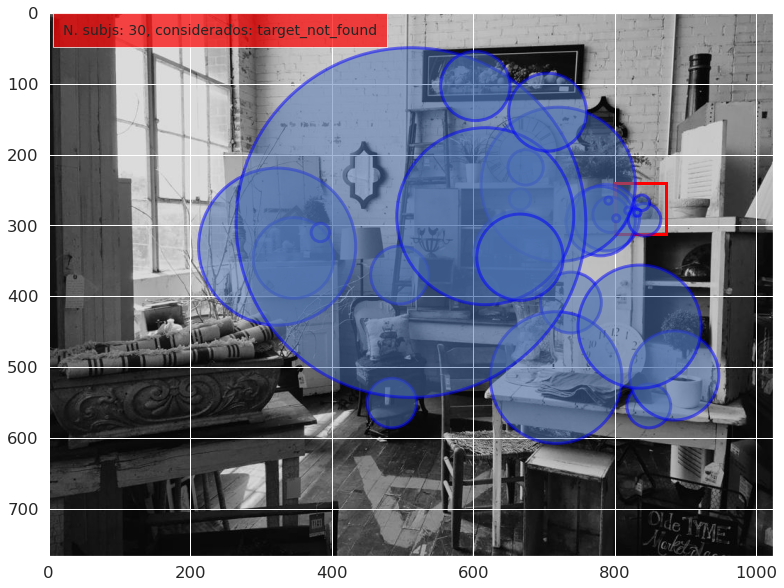

In [76]:
%autoreload
import mytools as tl
tl.plot_image_responses(image_name=image_name,
                        data_path=data_path,
                        resp_path=resp_path,
                        y_correction = False,
                        use='target_not_found')

## Análisis de los targets encontrados online vs. respuesta subjetiva

In [ ]:
#sns.set_context(context='notebook', font_scale=1.1)
# Histogramas exploratorios
#responses_data.loc[:,responses_data.columns.difference(['subj'])].hist(figsize=(16,12), bins=15);

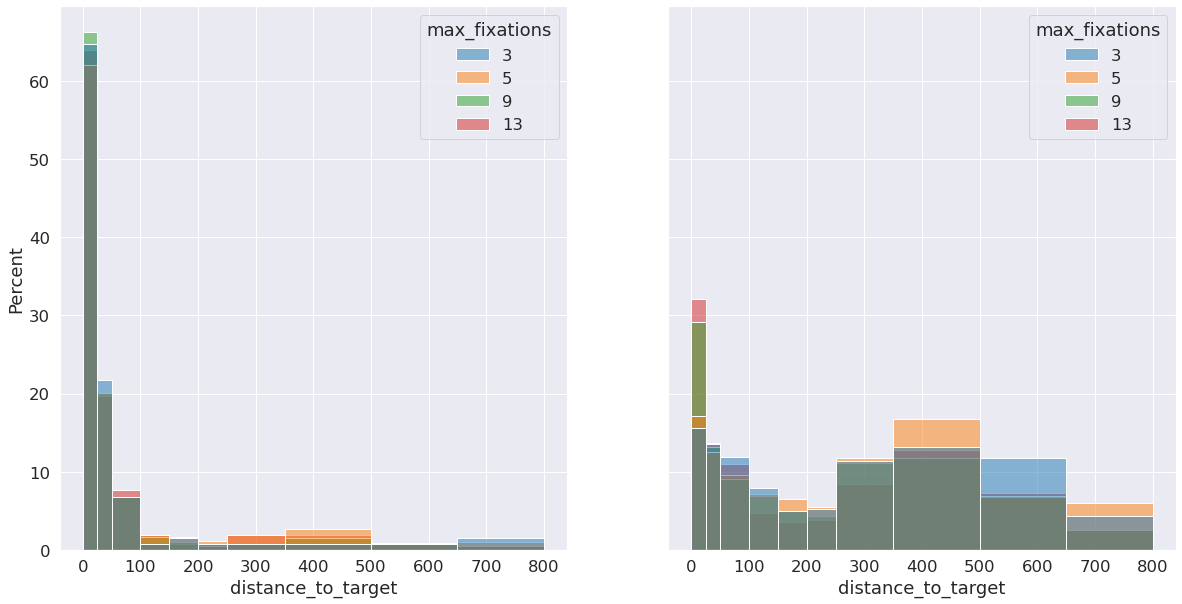

In [77]:
# Agrupemos por max fixations y veamos que pasa con las respuestas segun la cantidad de sacadas permitidas

bins = np.array([0,25,50,100,150,200,250,350,500,650,800])
palette = sns.color_palette('tab10',4)
_, ax = plt.subplots(1,2, figsize=(20,10), sharey=True)

sns.histplot(x='distance_to_target',hue= 'max_fixations',data=responses_data[responses_data.target_found],
                bins = bins, palette=palette, ax=ax[0], stat='percent', common_norm=False);
sns.histplot(x='distance_to_target',hue= 'max_fixations',data=responses_data[~responses_data.target_found],
                bins = bins, palette=palette, ax=ax[1], stat='percent', common_norm=False);


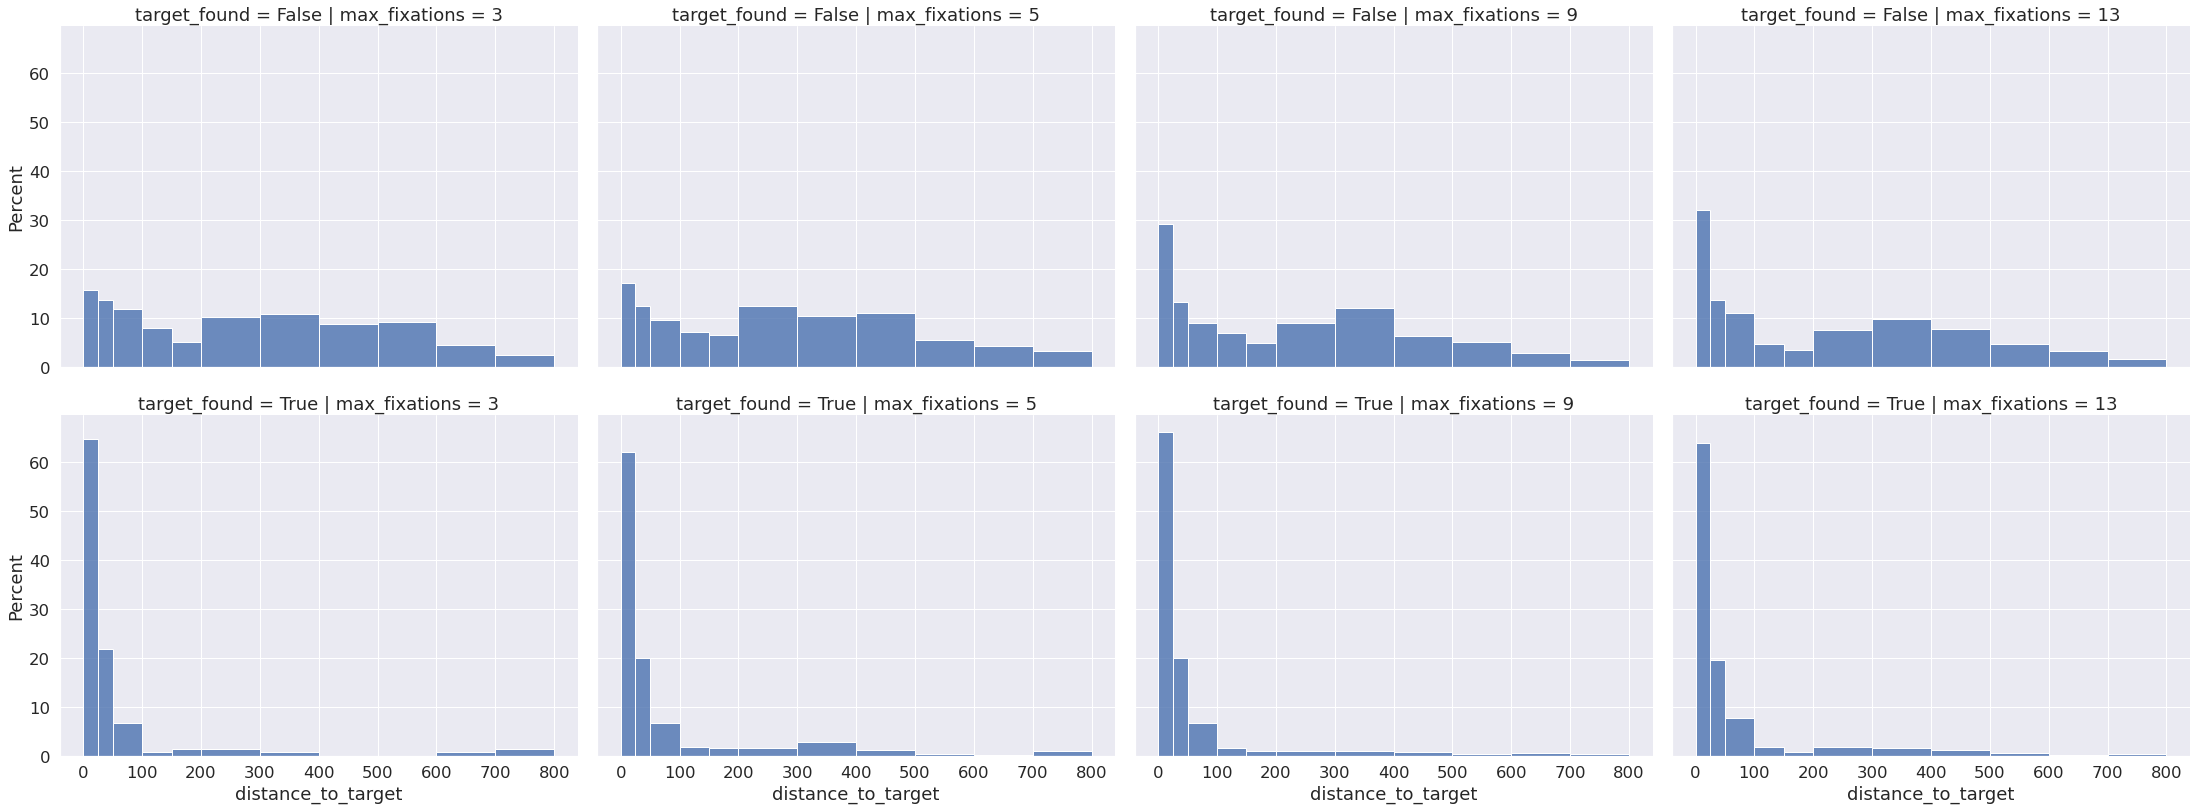

In [52]:
# separar estos histogramas por max_fixations
# col="max_fixations", hue="target_found_response",
var="distance_to_target"
grid = sns.FacetGrid(responses_data, col="max_fixations", row='target_found',
                    palette="GnBu_d", height=5.8, aspect=1.33)

bins = np.array([0,25,50,100,150,200,300,400,500,600,700,800])
grid.map(sns.histplot, var, stat='percent', alpha=0.8, common_norm=False, bins=bins);
grid.tight_layout()
plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))

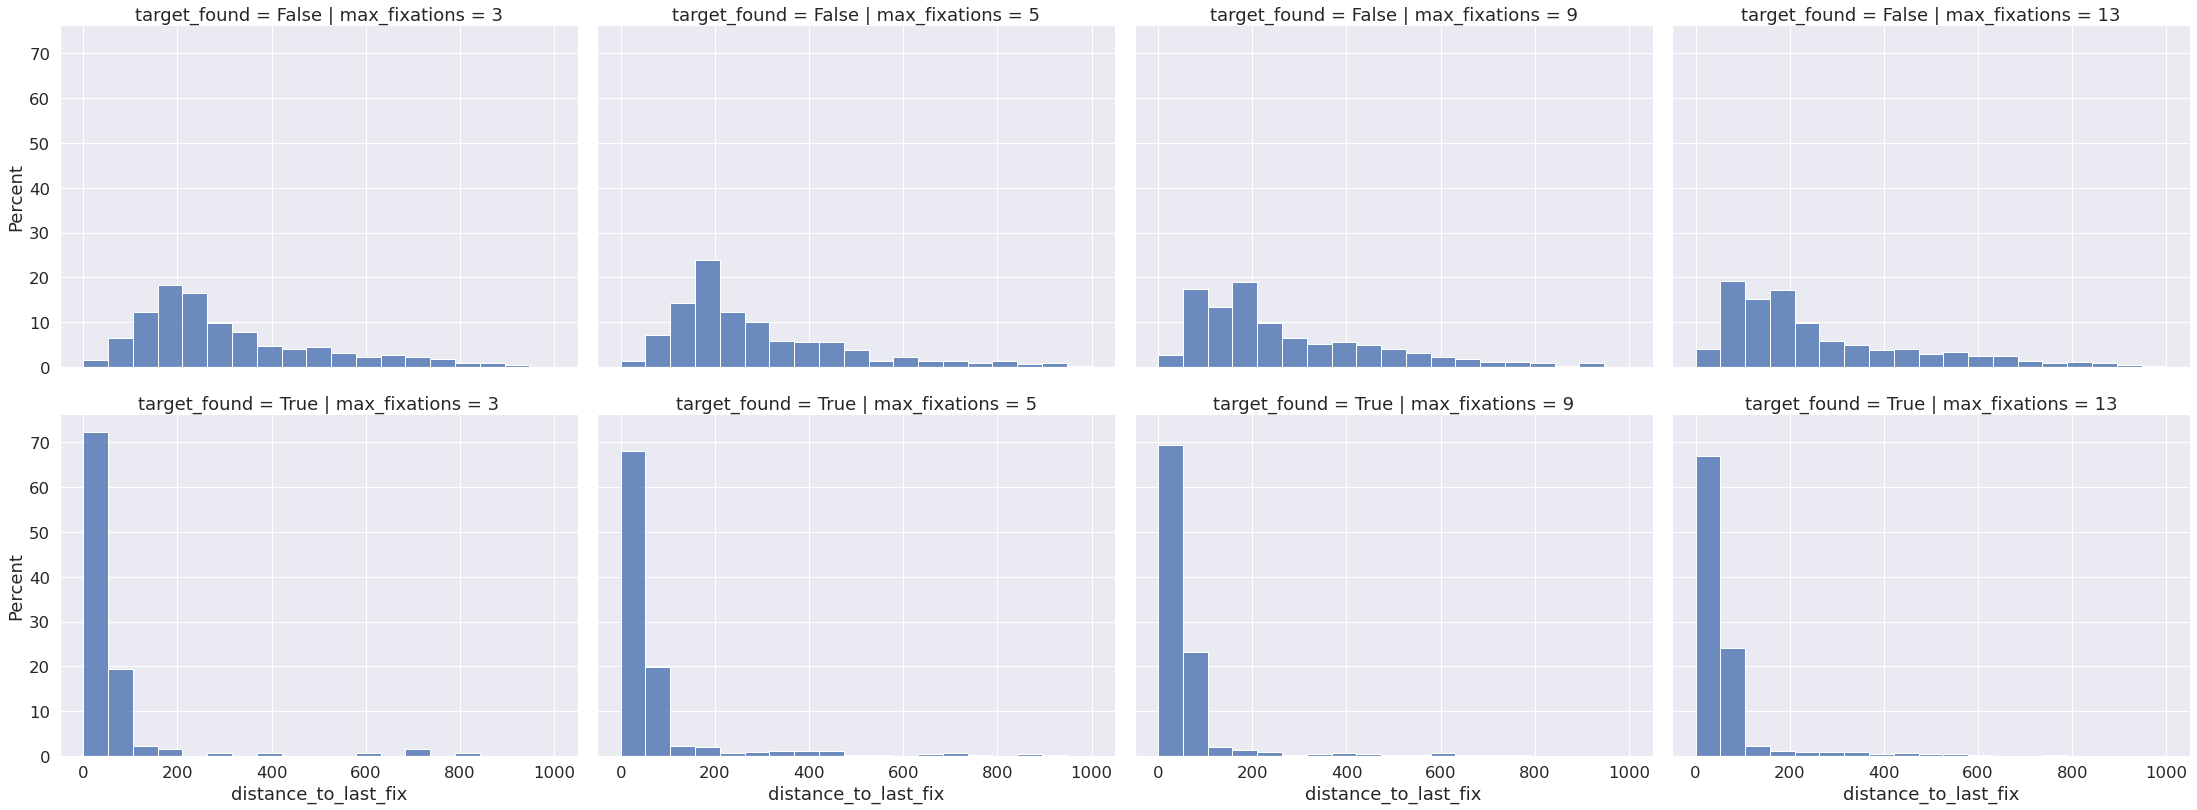

In [53]:
var = "distance_to_last_fix"
grid = sns.FacetGrid(responses_data, col="max_fixations", row="target_found",
                    palette="GnBu_d", height=5.8, aspect=1.33)
bins_hist = np.linspace(0,1000, 20)
grid.map(sns.histplot, var, stat='percent', alpha=0.8, common_norm=False, bins=bins_hist);
grid.tight_layout()

plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))

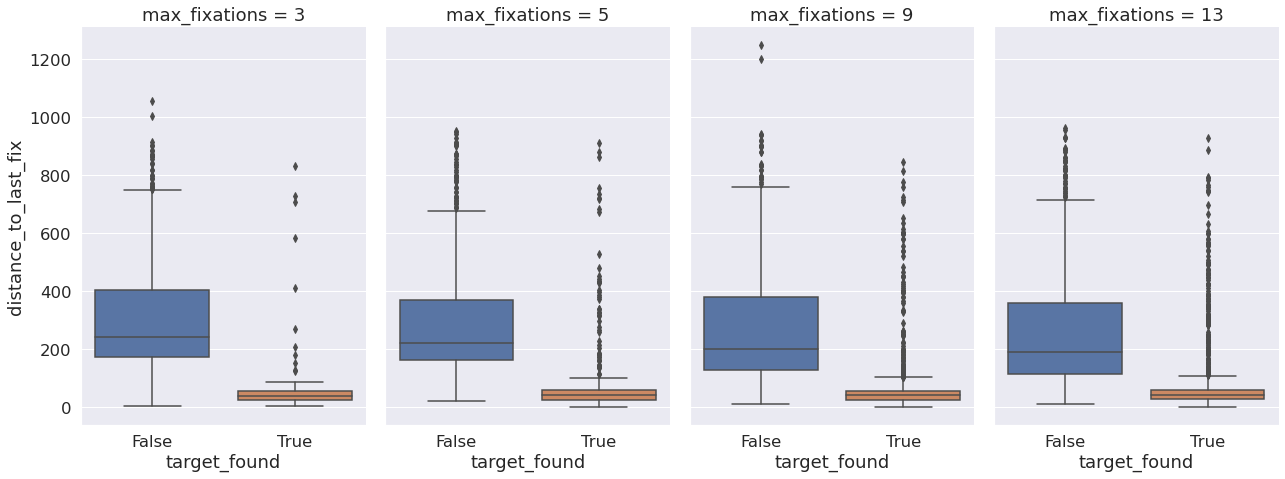

In [54]:
g = sns.catplot(
    data=responses_data, x="target_found", y=var, col="max_fixations",
    kind="box", height=7, aspect=.65,
)
g.savefig(os.path.join(figs_path, f'grid_{var}_boxplot.png'))

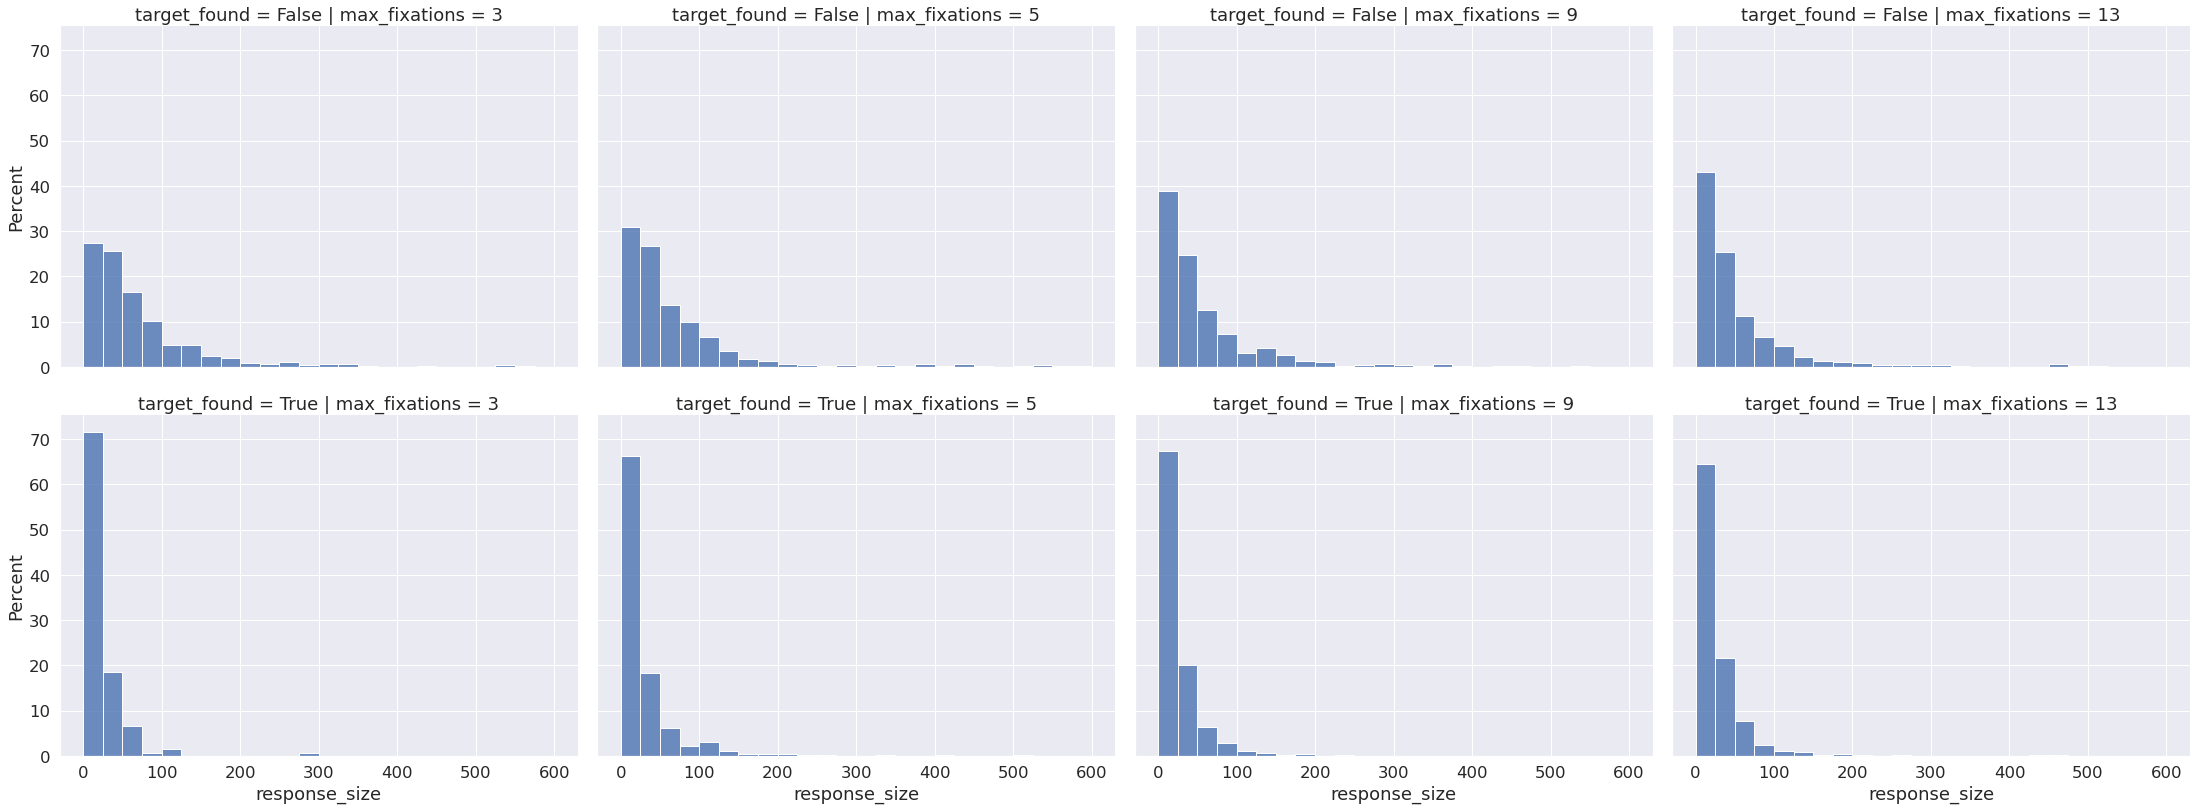

In [55]:
var = "response_size"
grid = sns.FacetGrid(responses_data, col="max_fixations", row='target_found',
                    palette="GnBu_d", height=5.8, aspect=1.33)
bins_hist = np.linspace(0,600, 25)
grid.map(sns.histplot, var, stat='percent', alpha=0.8, common_norm=False, bins=bins_hist);

grid.tight_layout()

plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))

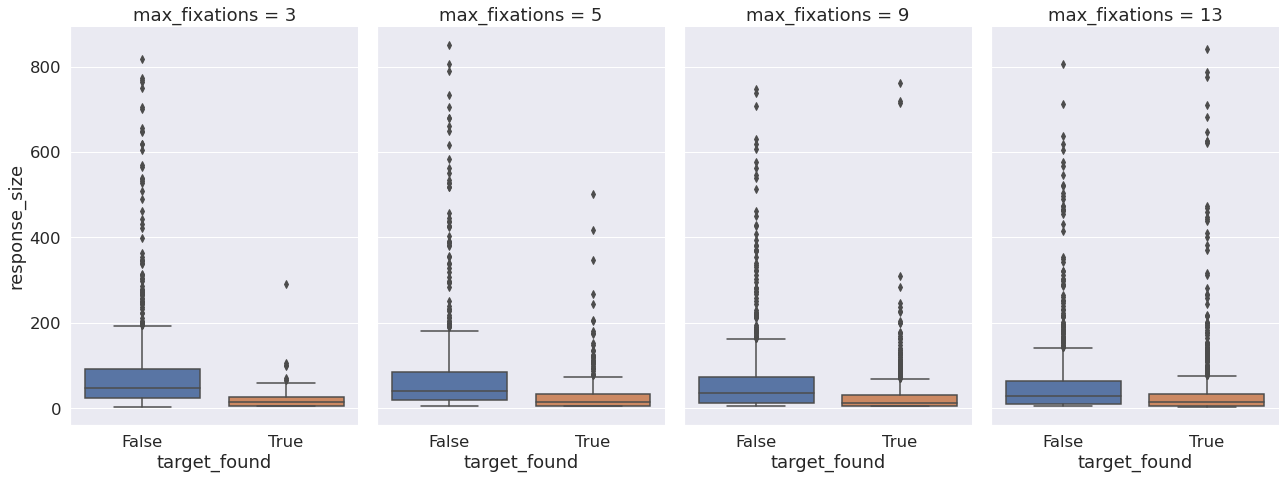

In [56]:
g = sns.catplot(
    data=responses_data, x="target_found", y=var, col="max_fixations",
    kind="box", height=7, aspect=.65,
)
g.savefig(os.path.join(figs_path, f'grid_{var}_boxplot.png'))

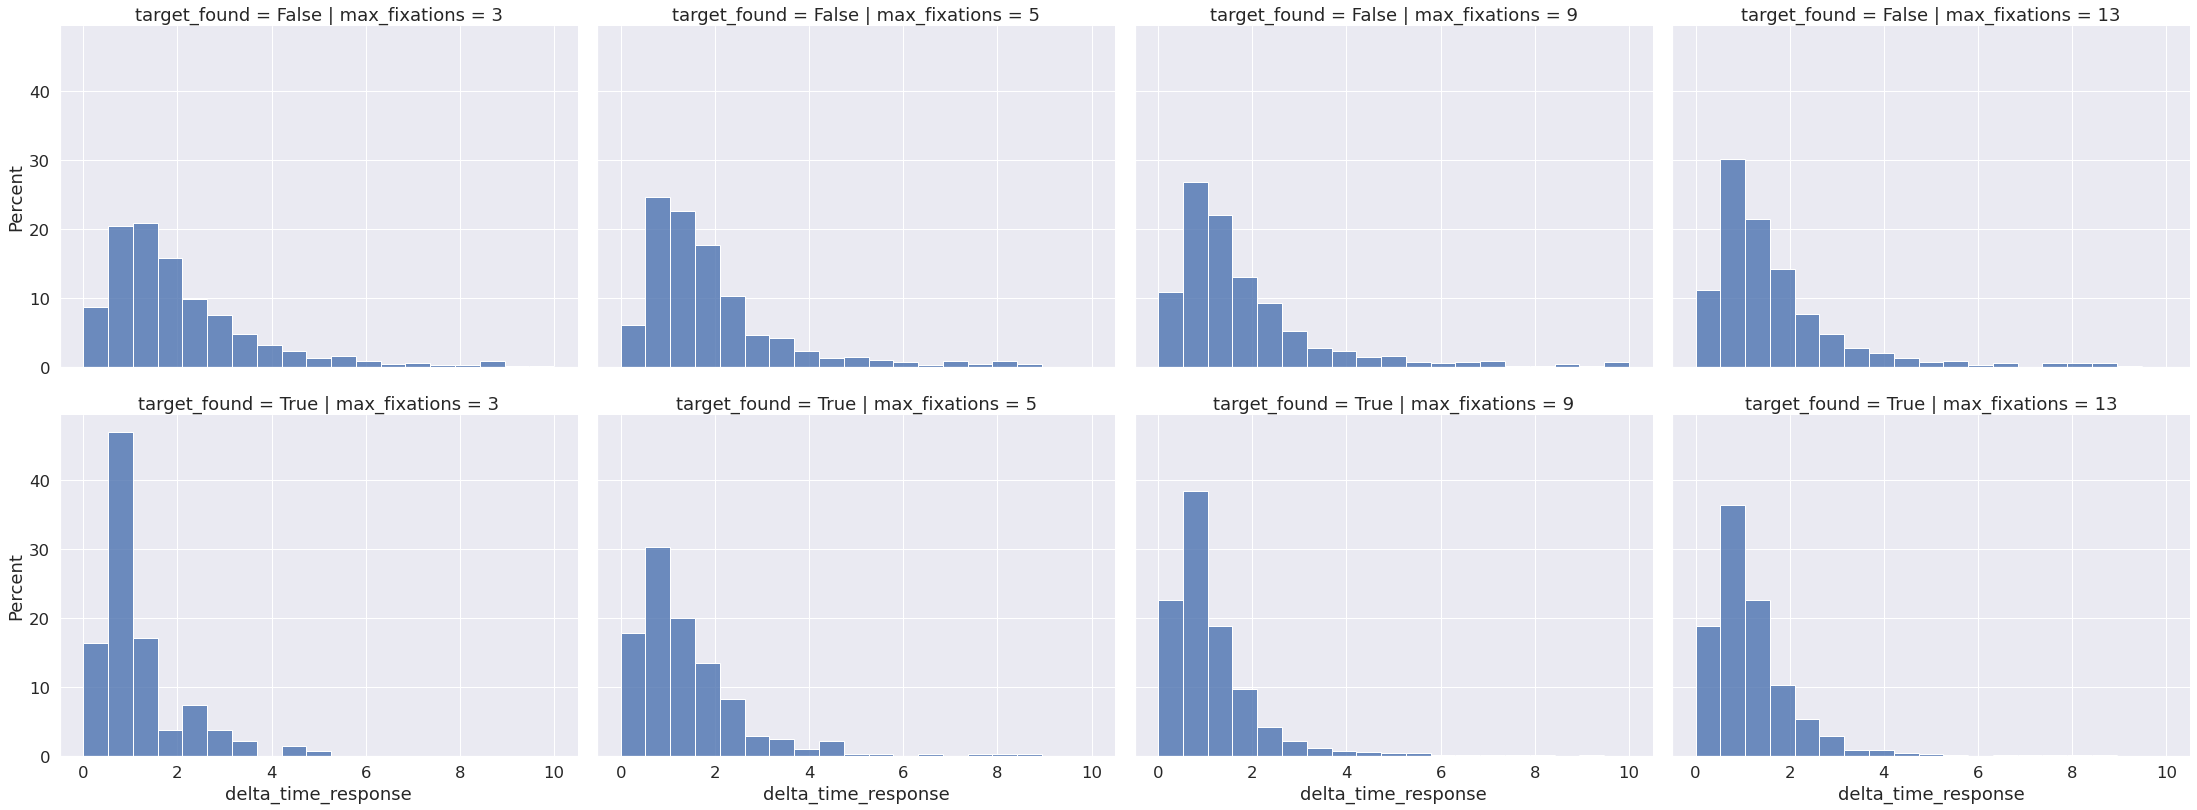

In [57]:
var = "delta_time_response"
grid = sns.FacetGrid(responses_data, col="max_fixations", row='target_found',
                    palette="GnBu_d", height=5.8, aspect=1.33)
bins_hist = np.linspace(0,10, 20)
grid.map(sns.histplot, var, stat='percent', alpha=0.8, common_norm=False, bins=bins_hist);
grid.tight_layout()

plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))

In [78]:
g = sns.catplot(
    data=responses_data, x="target_found", y=var, col="max_fixations",
    kind="box", height=7, aspect=.65,
)
g.savefig(os.path.join(figs_path, f'grid_{var}_boxplot.png'))

NameError: name 'var' is not defined

<AxesSubplot:xlabel='max_fixations', ylabel='distance_to_target'>

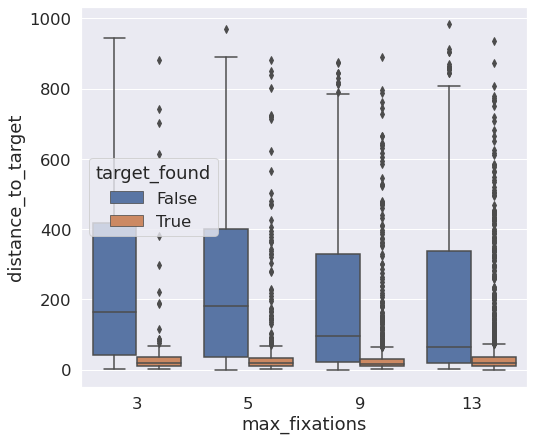

In [64]:
_,ax=plt.subplots(1,1, sharey=True, figsize=(8,7))

sns.boxplot(x='max_fixations',
            y='distance_to_target',
            hue='target_found',
            data=responses_data,
            ax=ax
            )

# sns.boxplot(x='max_fixations',
#             y='distance_to_target',
#             hue='target_found_response',
#             data=responses_data,
#             ax=ax[1]
#             )

<AxesSubplot:xlabel='max_fixations', ylabel='response_size'>

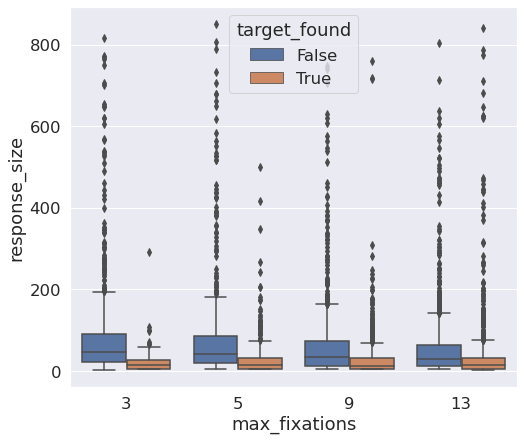

In [65]:
_,ax=plt.subplots(1,1, sharey=True, figsize=(8,7))

sns.boxplot(x='max_fixations',
            y='response_size',
            hue='target_found',
            data=responses_data,
            ax=ax
            )

# sns.boxplot(x='max_fixations',
#             y='response_size',
#             hue='target_found_response',
#             data=responses_data,
#             ax=ax[1]
#             )

<AxesSubplot:xlabel='max_fixations', ylabel='distance_to_last_fix'>

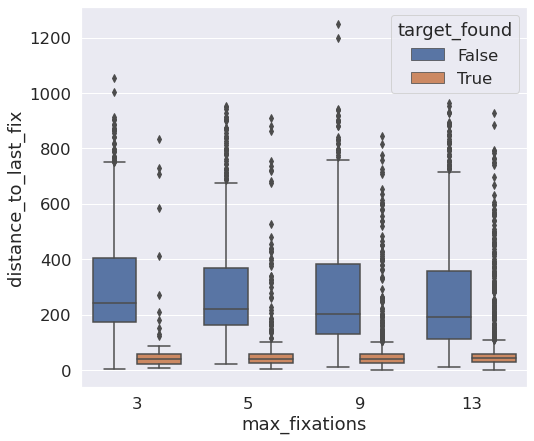

In [66]:
_,ax=plt.subplots(1,1, sharey=True, figsize=(8,7))

sns.boxplot(x='max_fixations',
            y='distance_to_last_fix',
            hue='target_found',
            data=responses_data,
            ax=ax
            )

# sns.boxplot(x='max_fixations',
#             y='distance_to_last_fix',
#             hue='target_found_response',
#             data=responses_data,
#             ax=ax[1]
#             )

<AxesSubplot:xlabel='max_fixations', ylabel='delta_time_response'>

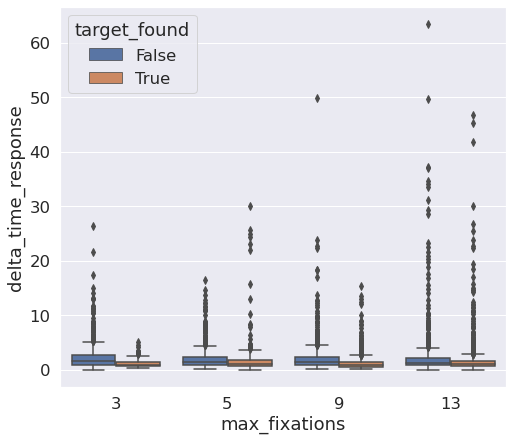

In [67]:
_,ax=plt.subplots(1,1, sharey=True, figsize=(8,7))

sns.boxplot(x='max_fixations',
            y='delta_time_response',
            hue='target_found',
            data=responses_data,
            ax=ax
            )

### Escala logarítmica

In [79]:
responses_data['delta_time_response_log']  = np.log(responses_data['delta_time_response'])
responses_data['distance_to_target_log']   = np.log(responses_data['distance_to_target'])
responses_data['distance_to_last_fix_log'] = np.log(responses_data['distance_to_last_fix'])
responses_data['response_size_log']        = np.log(responses_data['response_size'])
responses_data.head()

/home/gastonb/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


subj                              img  max_fixations  scanpath_length  \
0    41      grayscale_11_opensource.jpg             13               10   
1    41  grayscale_18_housebeautiful.jpg              9               10   
2    41          grayscale_100_oliva.jpg              5                3   
3    41           grayscale_17_oliva.jpg              3                2   
4    41  grayscale_16_housebeautiful.jpg              3                4   

   target_found  target_found_response  response_size  distance_to_target  \
0         False                  False             29          266.810794   
1         False                  False             47          329.200547   
2          True                  False             19          202.054448   
3         False                  False             35          297.692795   
4         False                  False             19          568.198029   

   distance_to_last_fix  delta_time_response  response_x  response_y  \
0            213.164661            49.599536       486.0       447.0   
1            411.615026             9.666707       520.0       538.0   
2            204.544005             5.633140       714.0       218.0   
3            208.923431             4.266648       433.0       316.0   
4            223.650531             2.900187       762.0       442.0   

   target_bbox_x  target_bbox_y  response_target_relative_x  \
0            228            559                      -258.0   
1            797            400                       277.0   
2            713            381                        -1.0   
3            186            490                      -247.0   
4            158            421                      -604.0   

   response_target_relative_y  delta_time_response_log  \
0                       112.0                 3.903981   
1                      -138.0                 2.268688   
2                       163.0                 1.728667   
3                       174.0                 1.450829   
4                       -21.0                 1.064775   

   distance_to_target_log  distance_to_last_fix_log  response_size_log  
0                5.586540                  5.362065           3.367296  
1                5.796667                  6.020089           3.850148  
2                5.308537                  5.320783           2.944439  
3                5.696062                  5.341968           3.555348  
4                6.342470                  5.410085           2.944439

In [111]:
# cheqeuo de infs
print(responses_data['distance_to_target_log'].min())
mymask = [responses_data['distance_to_target_log'] == -np.inf]
print('Cantidad de menos infinito: {}'.format(responses_data[responses_data['distance_to_target_log'] == -np.inf].shape[0]))
(responses_data==-np.inf).sum()

-inf
Cantidad de menos infinito: 4


subj                          0
img                           0
max_fixations                 0
scanpath_length               0
target_found                  0
target_found_response         0
response_size                 0
distance_to_target            0
distance_to_last_fix          0
delta_time_response           0
response_x                    0
response_y                    0
target_bbox_x                 0
target_bbox_y                 0
response_target_relative_x    0
response_target_relative_y    0
delta_time_response_log       0
distance_to_target_log        4
distance_to_last_fix_log      0
response_size_log             0
dtype: int64

In [114]:
# reemplazo esos valores
responses_data.replace(-np.inf, 0, inplace=True)
(responses_data==-np.inf).sum()

subj                          0
img                           0
max_fixations                 0
scanpath_length               0
target_found                  0
target_found_response         0
response_size                 0
distance_to_target            0
distance_to_last_fix          0
delta_time_response           0
response_x                    0
response_y                    0
target_bbox_x                 0
target_bbox_y                 0
response_target_relative_x    0
response_target_relative_y    0
delta_time_response_log       0
distance_to_target_log        0
distance_to_last_fix_log      0
response_size_log             0
dtype: int64

In [153]:
# el tamaño minimo de la respuesta parece ser de 3 pixeles
aux_min_response = np.exp(responses_data['response_size_log'].min())
print(f'Minimo tamaño de respuesta: {aux_min_response:0.02f}')

Minimo tamaño de respuesta: 3.00


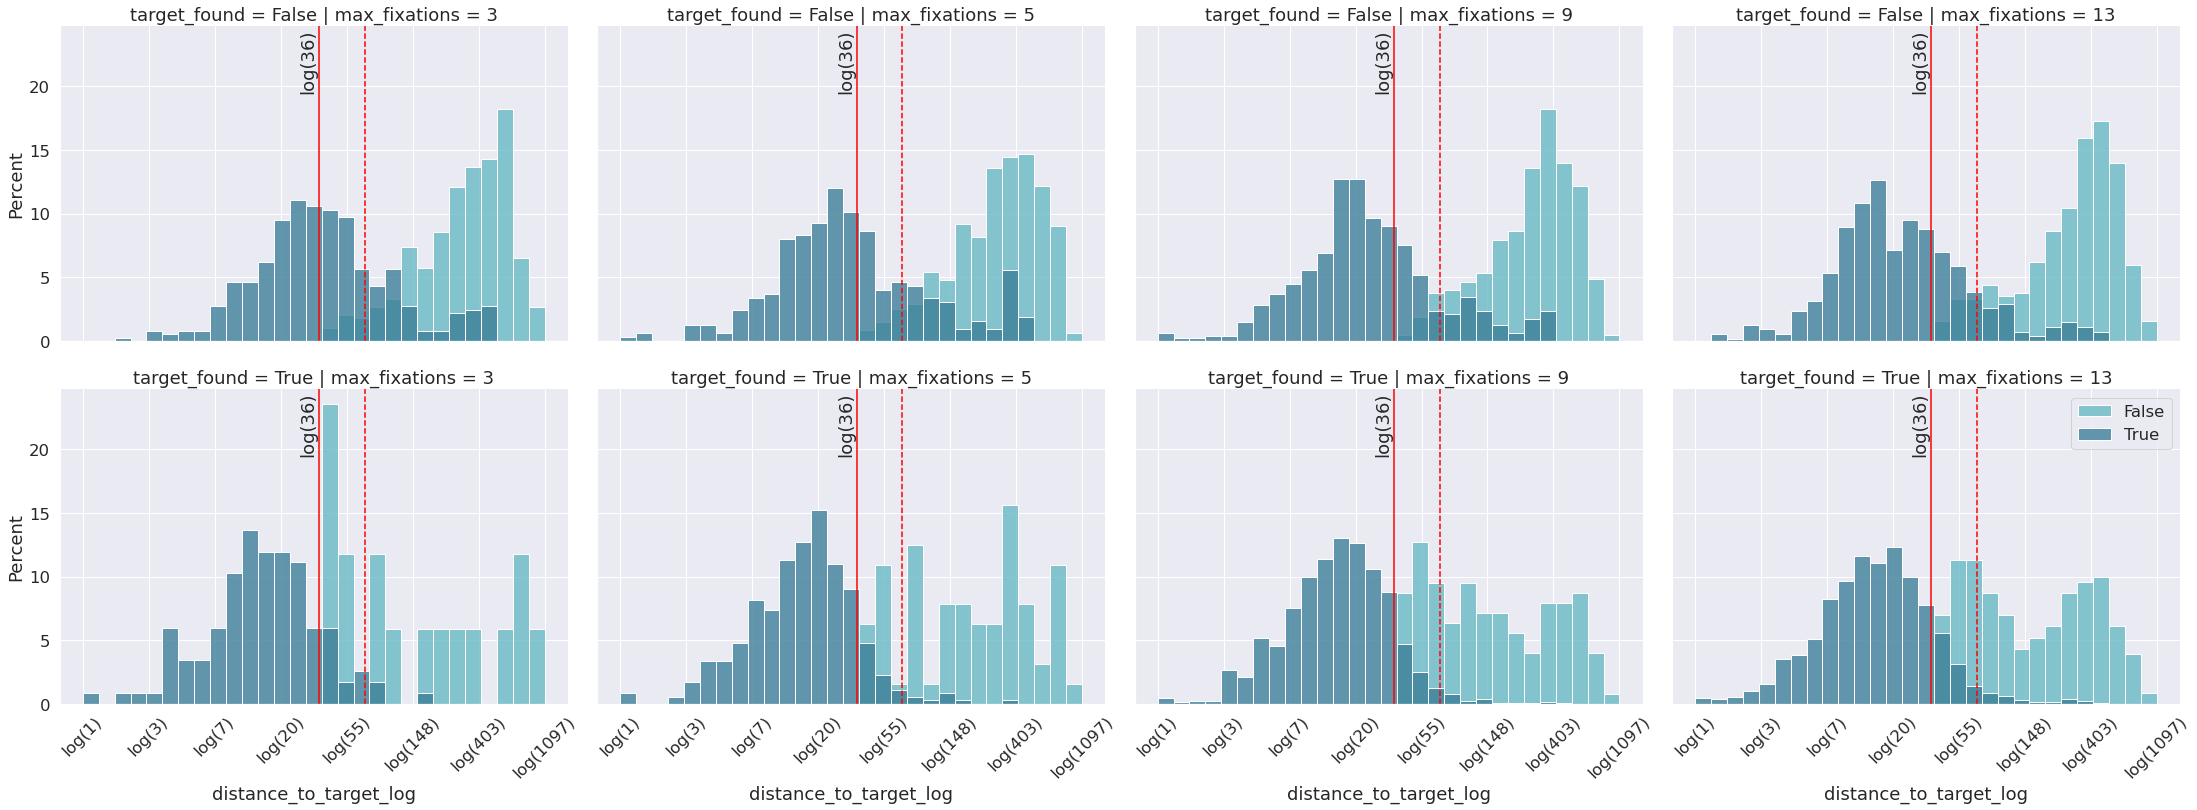

In [154]:
# distance_to_target_log
var = "distance_to_target_log"
grid = sns.FacetGrid(responses_data, col="max_fixations", row='target_found', hue='target_found_response',
                    palette="GnBu_d", height=5.8, aspect=1.33)

bins_hist = np.linspace(0,7,30)
grid.map(sns.histplot, var,bins=bins_hist, stat='percent', alpha=0.8, common_norm=False);
for i, ax in enumerate(grid.axes.ravel()):
    ax.axvline(np.log(36),color='red')
    ax.axvline(np.log(72),color='red',ls='--')
    trans = ax.get_xaxis_transform()
    ax.text(np.log(36)-0.3, .8, 'log(36)', transform=trans, rotation=90)
    if i > 3:
        ax.set_xticks(range(8))
        ax.set_xticklabels([f'log({np.exp(x):.0f})' for x in range(8)], rotation=45)
            
grid.tight_layout()
plt.legend()
plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))

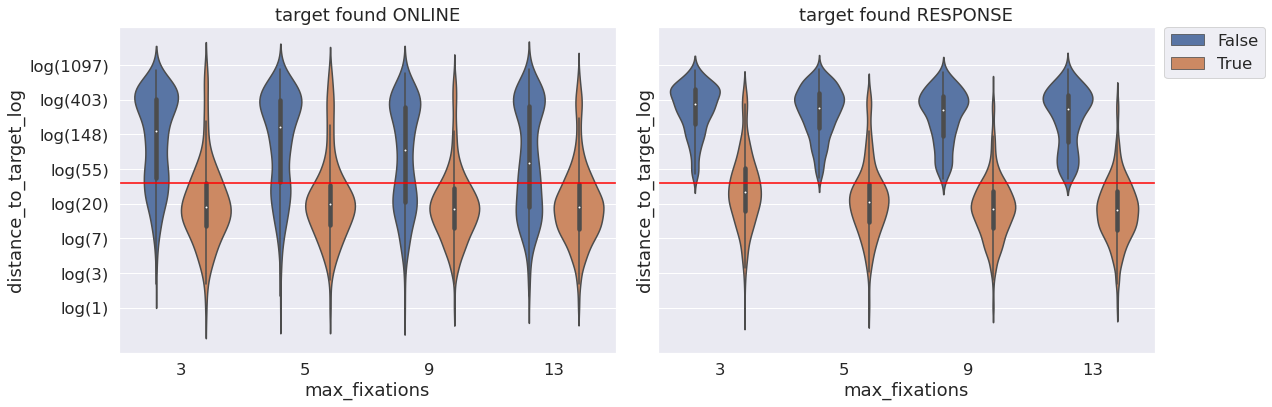

In [155]:
_,ax=plt.subplots(1,2, sharey=True, figsize=(18,6))

#g = sns.boxplot(x='max_fixations',
#            y=var,
#            hue='target_found',
#            data=responses_data,
#            ax=ax[0])
g = sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found',
            data=responses_data,
            ax=ax[0])    

ax[0].legend([], frameon=False)
ax[0].set_title('target found ONLINE')
ax[0].set_yticks(range(8))
ax[0].set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found_response',
            data=responses_data,
            ax=ax[1])
ax[1].set_title('target found RESPONSE')
ax[0].axhline(np.log(36),color='red')
ax[1].axhline(np.log(36),color='red')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, f'grid_{var}_violinplot.png'))

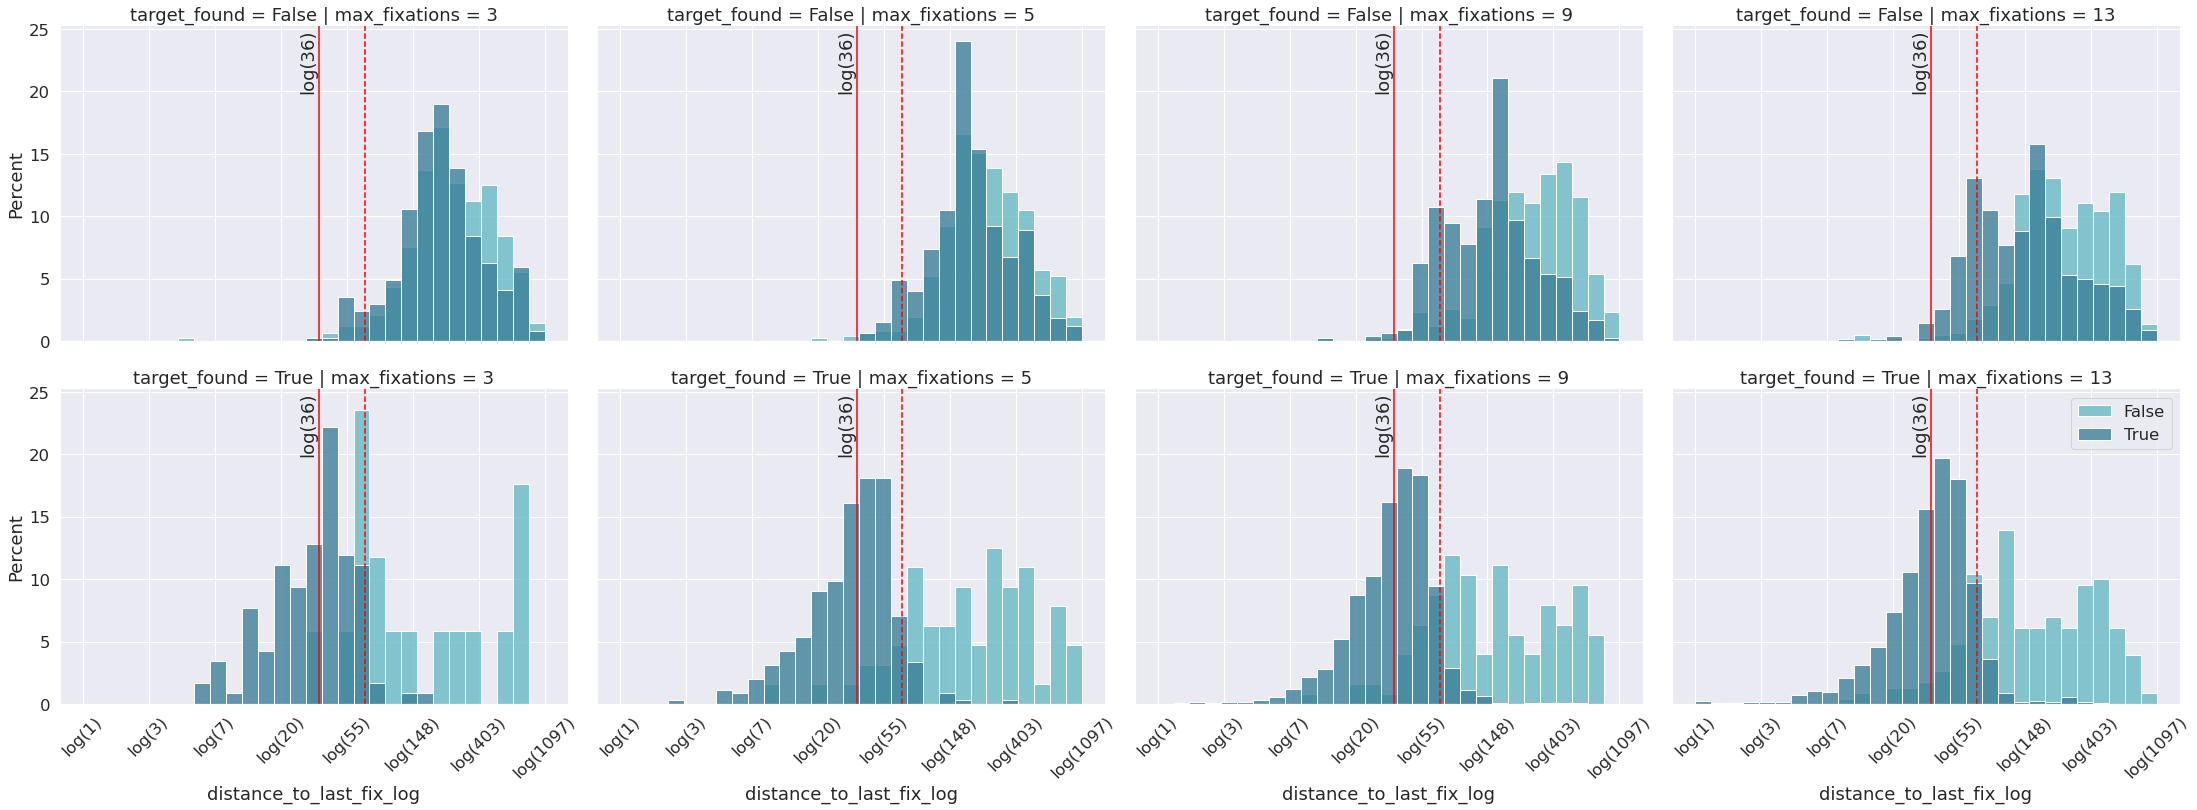

In [156]:
# distance_to_last_fix_log
var = "distance_to_last_fix_log"
grid = sns.FacetGrid(responses_data, col="max_fixations", row='target_found', hue='target_found_response',
                    palette="GnBu_d", height=5.8, aspect=1.33)

bins_hist = np.linspace(0,7,30)
grid.map(sns.histplot, var,bins=bins_hist, stat='percent', alpha=0.8, common_norm=False);
for i, ax in enumerate(grid.axes.ravel()):
    ax.axvline(np.log(36),color='red')
    ax.axvline(np.log(72),color='red',ls='--')
    trans = ax.get_xaxis_transform()
    ax.text(np.log(36)-0.3, .8, 'log(36)', transform=trans, rotation=90)
    if i > 3:
        ax.set_xticks(range(8))
        ax.set_xticklabels([f'log({np.exp(x):.0f})' for x in range(8)], rotation=45)
    
grid.tight_layout()
plt.legend()
plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))

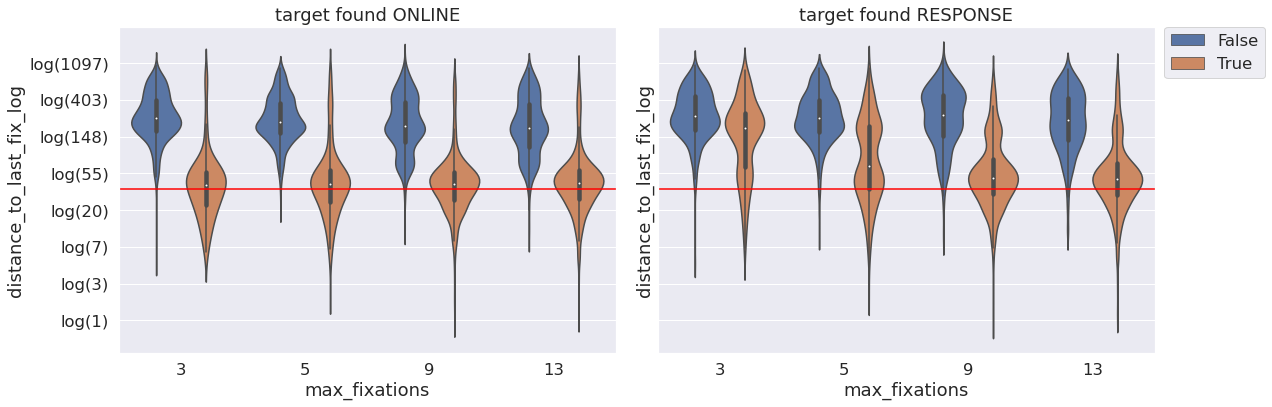

In [157]:
_,ax=plt.subplots(1,2, sharey=True, figsize=(18,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found',
            data=responses_data,
            ax=ax[0])

ax[0].legend([], frameon=False)
ax[0].set_title('target found ONLINE')
ax[0].set_yticks(range(8))
ax[0].set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found_response',
            data=responses_data,
            ax=ax[1])
ax[1].set_title('target found RESPONSE')
ax[0].axhline(np.log(36),color='red')
ax[1].axhline(np.log(36),color='red')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, f'grid_{var}_violinplot.png'))

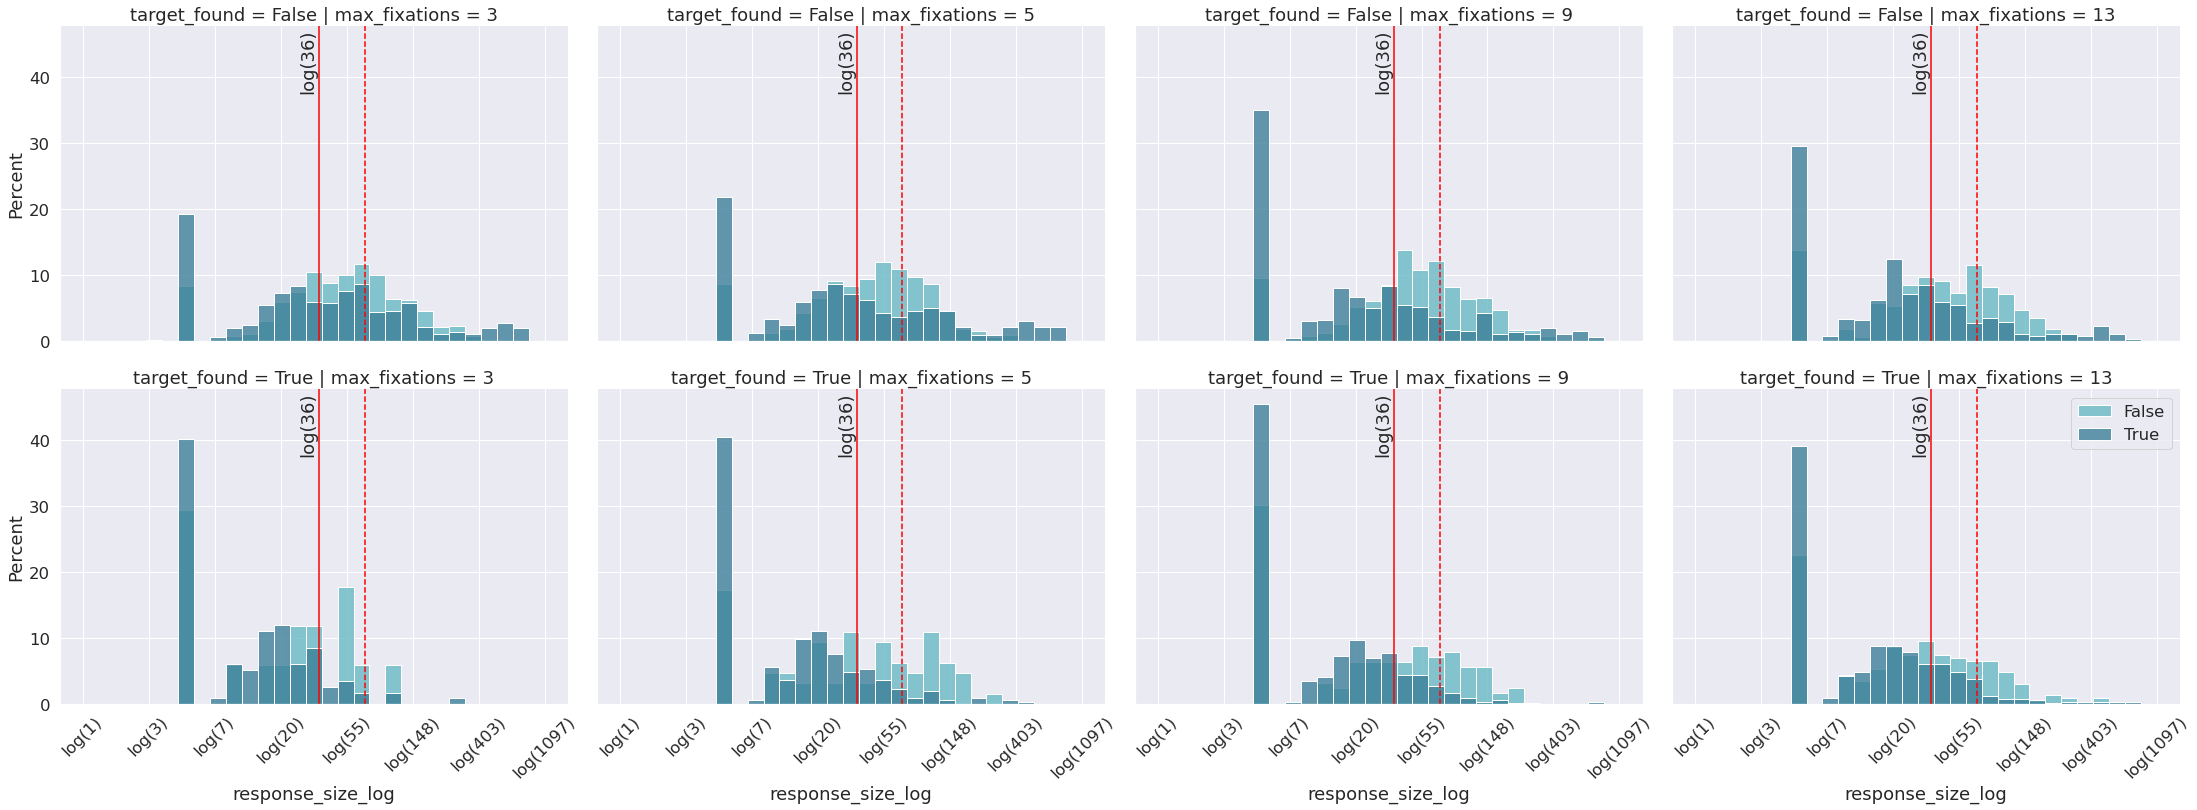

In [160]:
# response_size_log
var = "response_size_log"
grid = sns.FacetGrid(responses_data, col="max_fixations", row='target_found', hue='target_found_response',
                    palette="GnBu_d", height=5.8, aspect=1.33)
bins_hist = np.linspace(0,7,30)
grid.map(sns.histplot, var,bins=bins_hist, stat='percent', alpha=0.8, common_norm=False);
for i, ax in enumerate(grid.axes.ravel()):
    ax.axvline(np.log(36),color='red')
    ax.axvline(np.log(72),color='red',ls='--')
    trans = ax.get_xaxis_transform()
    ax.text(np.log(36)-0.3, .8, 'log(36)', transform=trans, rotation=90)
    if i > 3:
        ax.set_xticks(range(8))
        ax.set_xticklabels([f'log({np.exp(x):.0f})' for x in range(8)], rotation=45)
    
grid.tight_layout()
plt.legend()
plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))

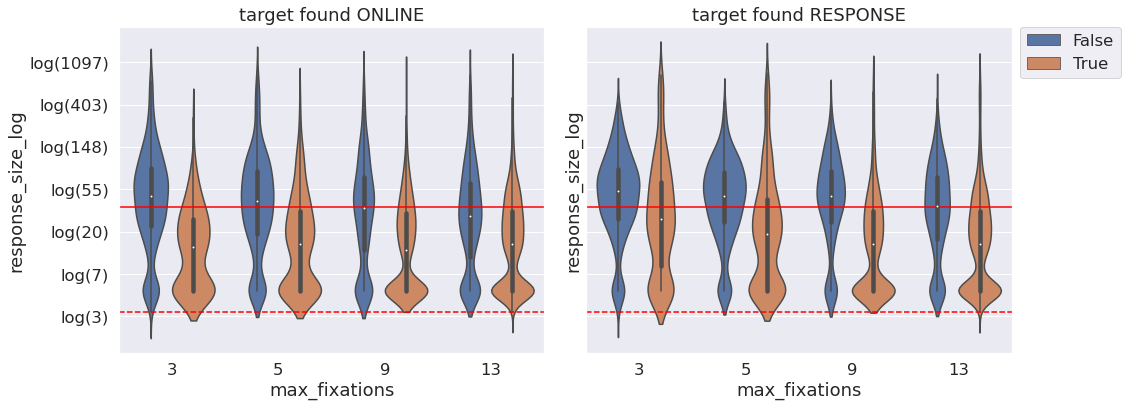

In [161]:
_,ax=plt.subplots(1,2, sharey=True, figsize=(16,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found',
            data=responses_data,
            ax=ax[0])

ax[0].legend([], frameon=False)
ax[0].set_title('target found ONLINE')
ax[0].set_yticks(range(8))
ax[0].set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found_response',
            data=responses_data,
            ax=ax[1])
ax[1].set_title('target found RESPONSE')
ax[0].axhline(np.log(36),color='red')
ax[0].axhline(np.log(3),color='red', ls='--')
ax[1].axhline(np.log(36),color='red')
ax[1].axhline(np.log(3),color='red', ls='--')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, f'grid_{var}_violinplot.png'))

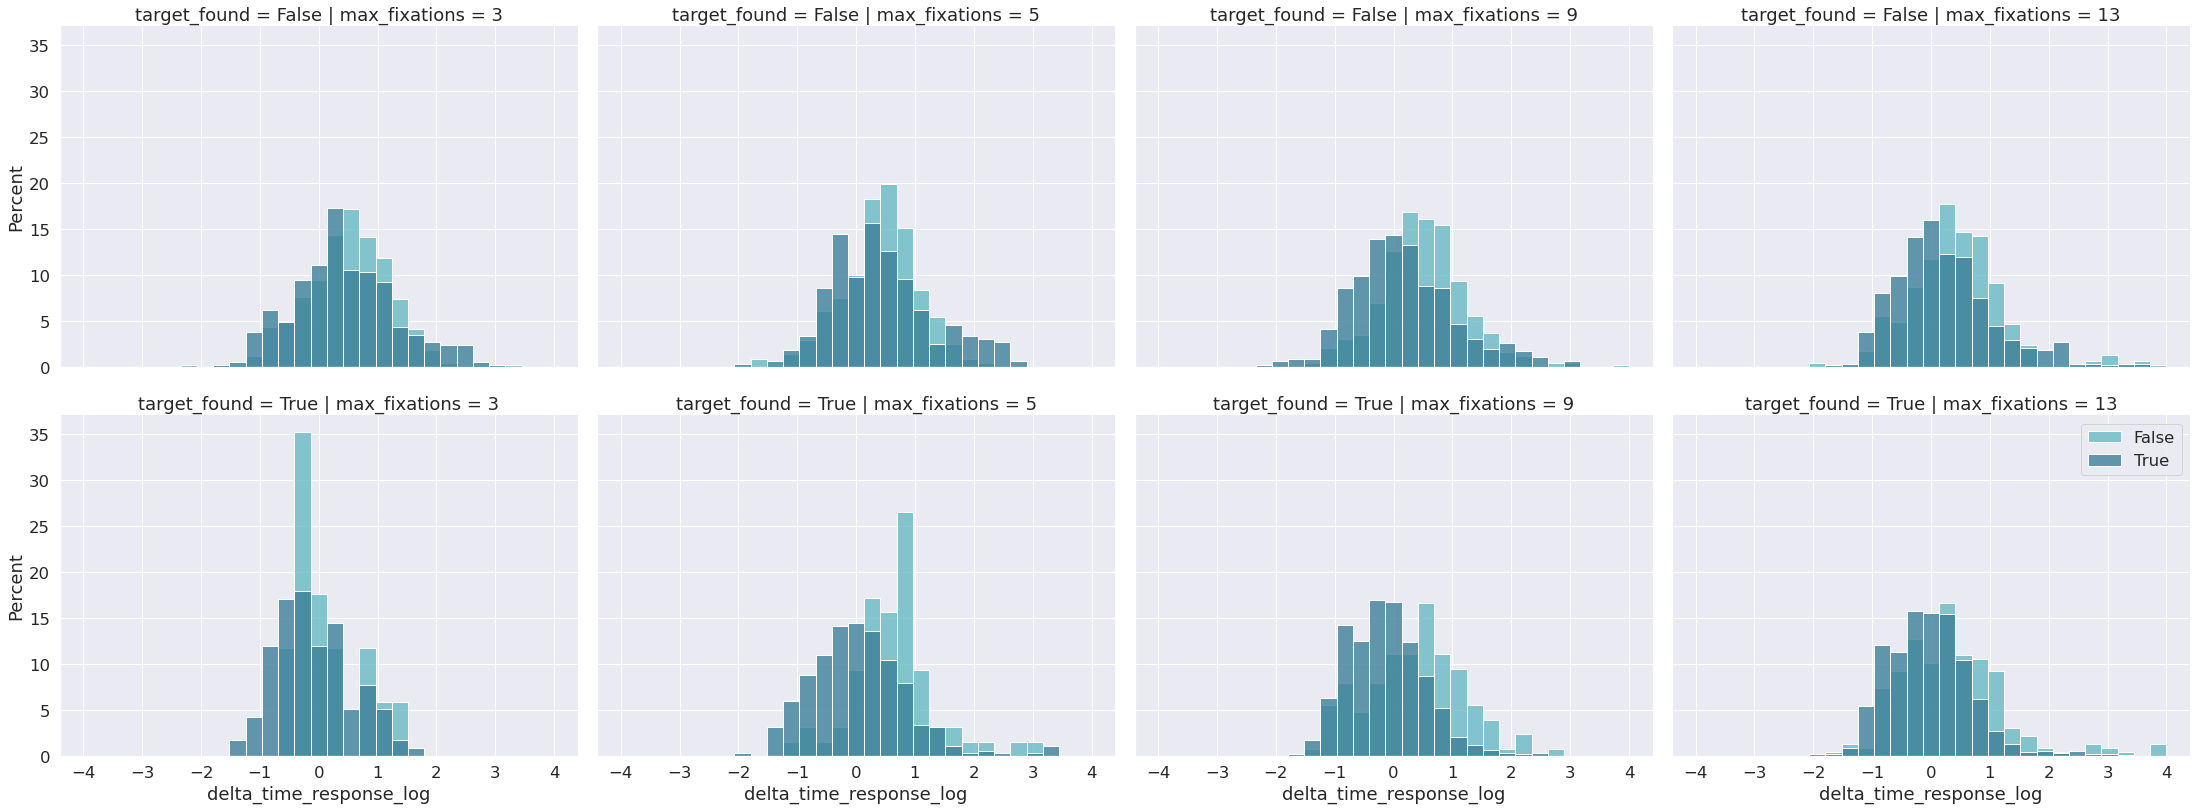

In [122]:
# delta_time_response_log
var = "delta_time_response_log"
grid = sns.FacetGrid(responses_data, col="max_fixations", row='target_found', hue='target_found_response',
                    palette="GnBu_d", height=5.8, aspect=1.33)

bins_hist = np.linspace(-4,4,30)
grid.map(sns.histplot, var, bins=bins_hist, stat='percent', alpha=0.8, common_norm=False);

grid.tight_layout()
plt.legend()
plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))


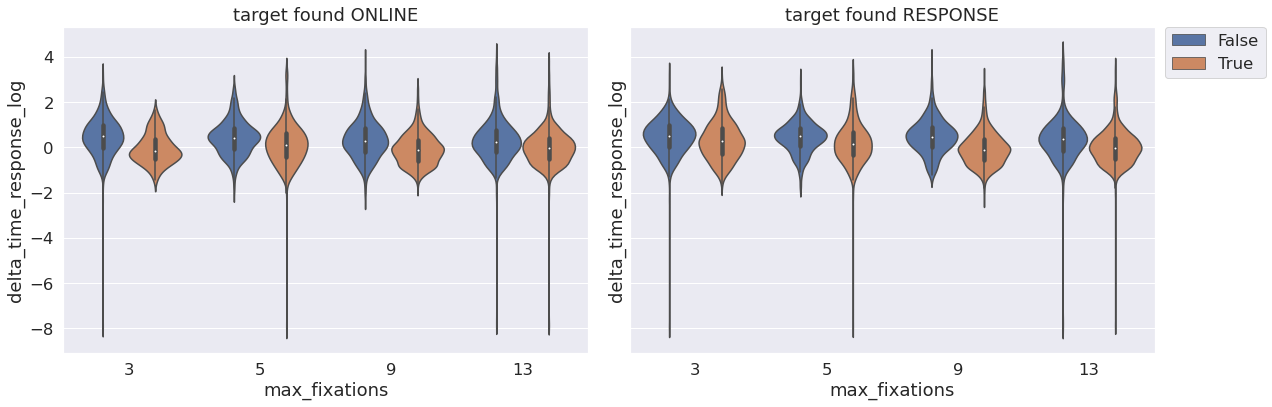

In [123]:
_,ax=plt.subplots(1,2, sharey=True, figsize=(18,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found',
            data=responses_data,
            ax=ax[0])

ax[0].legend([], frameon=False)
ax[0].set_title('target found ONLINE')
sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found_response',
            data=responses_data,
            ax=ax[1])
ax[1].set_title('target found RESPONSE')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, f'grid_{var}_violinplot.png'))

### Separando en 4 grupos

Hay básicamente 4 grupos dependiendo si encontró el target de manera online (TFO) y si lo encontró con la respuesta (TFR):

- TFO & TFR: una especie de True Positive, lo vió y lo encontró 
- ~TFO & TFR: no lo vió pero tiene una idea de donde puede estar 
- TFO & ~TFR: lo vió pero no lo encontró
- ~TFO & ~TFR: no lo encontró ni lo vió

In [126]:
responses_data.head()

subj                              img  max_fixations  scanpath_length  \
0    41      grayscale_11_opensource.jpg             13               10   
1    41  grayscale_18_housebeautiful.jpg              9               10   
2    41          grayscale_100_oliva.jpg              5                3   
3    41           grayscale_17_oliva.jpg              3                2   
4    41  grayscale_16_housebeautiful.jpg              3                4   

   target_found  target_found_response  response_size  distance_to_target  \
0         False                  False             29          266.810794   
1         False                  False             47          329.200547   
2          True                  False             19          202.054448   
3         False                  False             35          297.692795   
4         False                  False             19          568.198029   

   distance_to_last_fix  delta_time_response  ...  response_y  target_bbox_x  \
0            213.164661            49.599536  ...       447.0            228   
1            411.615026             9.666707  ...       538.0            797   
2            204.544005             5.633140  ...       218.0            713   
3            208.923431             4.266648  ...       316.0            186   
4            223.650531             2.900187  ...       442.0            158   

   target_bbox_y  response_target_relative_x  response_target_relative_y  \
0            559                      -258.0                       112.0   
1            400                       277.0                      -138.0   
2            381                        -1.0                       163.0   
3            490                      -247.0                       174.0   
4            421                      -604.0                       -21.0   

   delta_time_response_log  distance_to_target_log  distance_to_last_fix_log  \
0                 3.903981                5.586540                  5.362065   
1                 2.268688                5.796667                  6.020089   
2                 1.728667                5.308537                  5.320783   
3                 1.450829                5.696062                  5.341968   
4                 1.064775                6.342470                  5.410085   

   response_size_log  online_not_found_response_found  
0           3.367296                            False  
1           3.850148                            False  
2           2.944439                            False  
3           3.555348                            False  
4           2.944439                            False  

[5 rows x 21 columns]

In [139]:
def cat_trial(row):
    if row['target_found'] and row['target_found_response']:
        return 'TFO & TFR'
    elif ~row['target_found'] and row['target_found_response']:
        return '~TFO & TFR'
    elif row['target_found'] and ~row['target_found_response']:
        return 'TFO & ~TFR'
    elif ~row['target_found'] and ~row['target_found_response']:
        return '~TFO & ~TFR'
    else:
        return 'ERROR'
responses_data_auxiliar_col = []
for idx, row in responses_data.iterrows():
    responses_data_auxiliar_col.append(cat_trial(row))
responses_data['found_category'] = responses_data_auxiliar_col
responses_data.found_category.value_counts()

TFO & TFR      3322
~TFO & ~TFR    1845
~TFO & TFR     1704
TFO & ~TFR      437
Name: found_category, dtype: int64

In [124]:
# Separo los casos donde no encontraron el target online pero si la respuesta
online_not_found_response_found = ~responses_data.target_found & responses_data.target_found_response
responses_data['online_not_found_response_found'] = online_not_found_response_found
print(responses_data.online_not_found_response_found.sum())
responses_data.target_found.value_counts()


1704


True     3759
False    3549
Name: target_found, dtype: int64

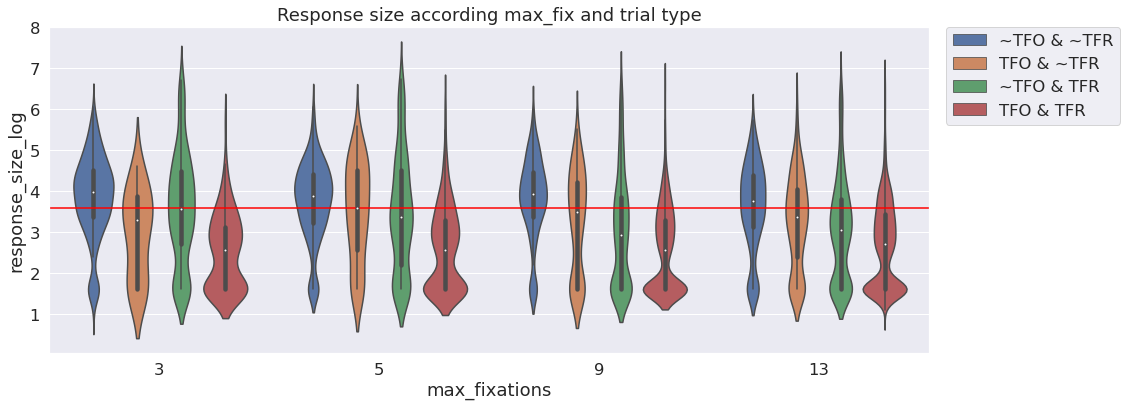

In [167]:
var = "response_size_log"
# grid = sns.FacetGrid(responses_data[responses_data.online_not_found_response_found], col="max_fixations",
#                     palette="GnBu_d", height=7, aspect=1.2)
# 
# bins_hist = np.linspace(0,7,30)
# grid.map(sns.histplot, var, bins=bins_hist, stat='percent', alpha=0.8, common_norm=False);
# for i, ax in enumerate(grid.axes.ravel()):
#     ax.axvline(np.log(36),color='red')
#     ax.axvline(np.log(72),color='red',ls='--')
#     trans = ax.get_xaxis_transform()
#     ax.text(np.log(36)-0.3, .8, 'log(36)', transform=trans, rotation=90)
#     if i > 3:
#         ax.set_xticks(range(8))
#         ax.set_xticklabels([f'log({np.exp(x):.0f})' for x in range(8)], rotation=45)

_,ax=plt.subplots(1,1, sharey=True, figsize=(16,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='found_category',
            data=responses_data,
            ax=ax)
ax.set_title('Response size according max_fix and trial type')
ax.axhline(np.log(36),color='red')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, f'{var}_found_category.png'))

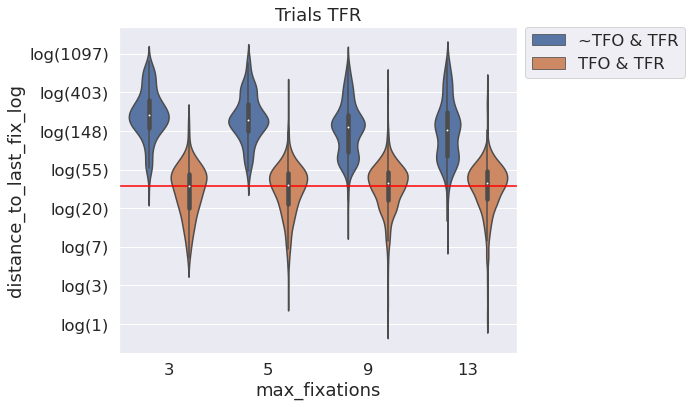

In [166]:
var = "distance_to_last_fix_log"

_,ax=plt.subplots(1,1, sharey=True, figsize=(10,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='found_category',
            data=responses_data[responses_data.found_category.isin(['TFO & TFR', '~TFO & TFR'])],
            ax=ax)
ax.set_title('Trials TFR')
ax.axhline(np.log(36),color='red')
ax.set_yticks(range(8))
ax.set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, f'{var}_found_response.png'))

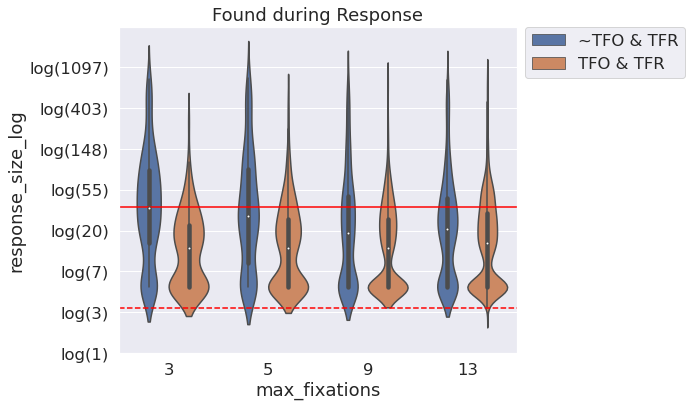

In [171]:
var = "response_size_log"

_,ax=plt.subplots(1,1, sharey=True, figsize=(10,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='found_category',
            data=responses_data[responses_data.found_category.isin(['TFO & TFR', '~TFO & TFR'])],
            ax=ax)
ax.set_title('Found during Response')
ax.axhline(np.log(36),color='red')
ax.set_yticks(range(8))
ax.set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
ax.axhline(np.log(3),color='red', ls='--')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, f'{var}_found_response.png'))

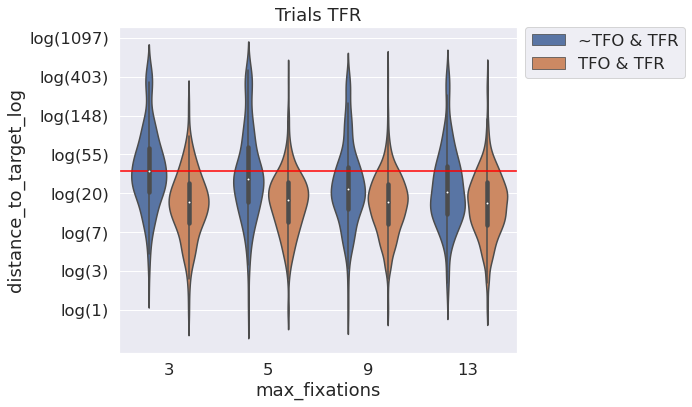

In [165]:
# Solamente por debug
var = "distance_to_target_log"

_,ax=plt.subplots(1,1, sharey=True, figsize=(10,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='found_category',
            data=responses_data[responses_data.found_category.isin(['TFO & TFR', '~TFO & TFR'])],
            ax=ax)

ax.set_title('Trials TFR')
ax.axhline(np.log(36),color='red')
ax.set_yticks(range(8))
ax.set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, f'{var}_found_response.png'))

### Probar transformaciones Box-Cox?

-0.19521072001417542


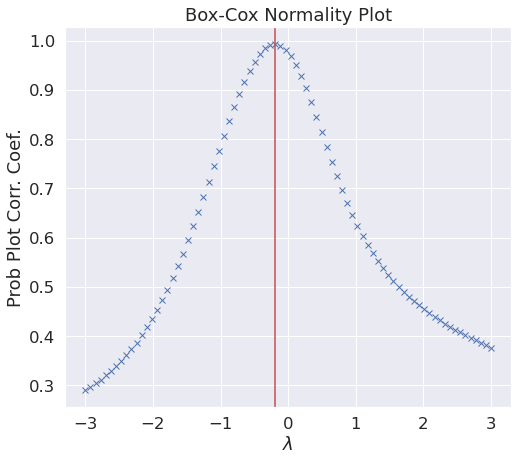

In [77]:
import scipy.stats as scp
_,ax=plt.subplots(1,1, sharey=True, figsize=(8,7))
x = responses_data[(responses_data.target_found)&(responses_data.distance_to_target>0)].loc[:,'distance_to_target']
prob = scp.boxcox_normplot(x,la=-3,lb=3, plot=ax)
_, maxlog = scp.boxcox(x)
ax.axvline(maxlog, color='r');
print(maxlog)


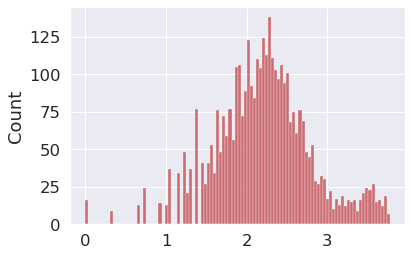

In [78]:
x_bc = scp.boxcox(x, maxlog)
sns.histplot(x_bc, bins=100, color='r', alpha=0.8);

### Online found y respuesta not found
La pregunta aca es si encontraron realmente el target en estos casos. Una cosa que podemos usar es el tiempo de fijación en el cual observaron el target

In [79]:
print('Total de trials donde se encontró el target online:',responses_data.target_found.sum())

print('Total de trials donde se encontró el target en respuesta:', 
        responses_data.target_found_response.sum())

print('Total de trials con target found online y respuesta:',
        responses_data[(responses_data.target_found) & (responses_data.target_found_response)].shape[0])
        
print('Total de trials con target found online pero que no acertaron en respuesta:',
        responses_data[(responses_data.target_found) & ~(responses_data.target_found_response)].shape[0])


Total de trials donde se encontró el target online: 3759
Total de trials donde se encontró el target en respuesta: 5026
Total de trials con target found online y respuesta: 3322
Total de trials con target found online pero que no acertaron en respuesta: 437


<AxesSubplot:xlabel='max_fixations', ylabel='distance_to_target'>

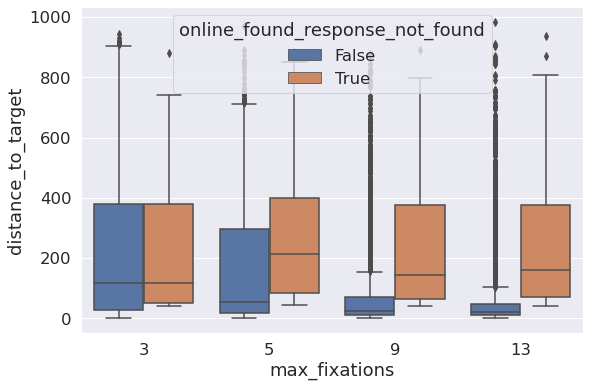

In [80]:
# Analicemos los sujetos que se supone que vieron el target pero en la respuesta no lo vieron

online_found_response_not_found = responses_data.target_found & ~responses_data.target_found_response
responses_data['online_found_response_not_found'] = online_found_response_not_found

_,ax=plt.subplots(1,1, figsize=(9,6))

# Boxplot de los casos encontrados online pero no con la respuesta
sns.boxplot(x='max_fixations',
            y='distance_to_target',
            hue='online_found_response_not_found',
            data=responses_data,
            ax=ax
            )

## Curvas de target found vs ntf

<AxesSubplot:xlabel='max_fixations', ylabel='distance_to_target'>

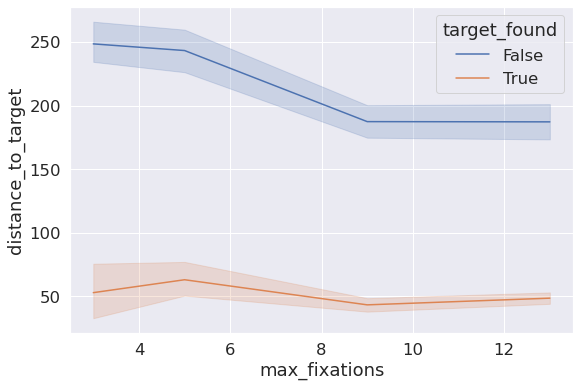

In [81]:
_,ax=plt.subplots(1,1, figsize=(9,6))

sns.lineplot(x='max_fixations',
            y='distance_to_target',
            #hue='online_found_response_not_found',
            hue='target_found',
            data=responses_data,
            ax=ax
            )

<AxesSubplot:xlabel='max_fixations', ylabel='response_size'>

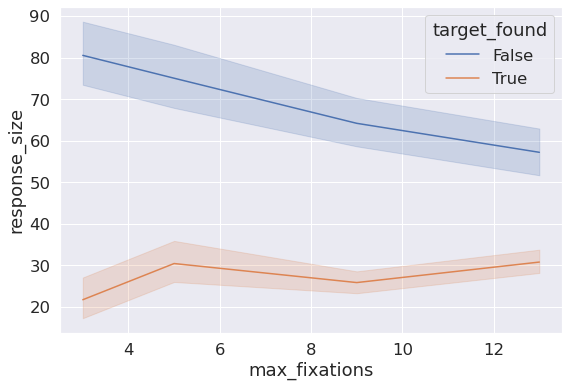

In [82]:
_,ax=plt.subplots(1,1, figsize=(9,6))
sns.lineplot(x='max_fixations',
            y='response_size',
            #hue='online_found_response_not_found',
            hue='target_found',
            data=responses_data,
            ax=ax
            )

<AxesSubplot:xlabel='max_fixations', ylabel='distance_to_last_fix'>

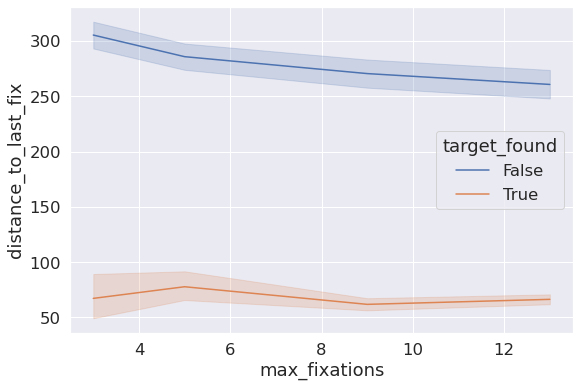

In [83]:
_,ax=plt.subplots(1,1, figsize=(9,6))
sns.lineplot(x='max_fixations',
            y='distance_to_last_fix',
            #hue='online_found_response_not_found',
            hue='target_found',
            data=responses_data,
            ax=ax
            )

### Usando los sujetos como un punto


In [109]:
def plot_column_max_fix_tf(data, column_plot='distance_to_target', save_path =figs_path):
    
    g = data.groupby(['subj','target_found','max_fixations']).mean()[column_plot].reset_index()
    
    _,ax=plt.subplots(1,1, figsize=(9,6))
    sns.lineplot(x='max_fixations',
                 y=column_plot,
                 hue='target_found',
                 data=g,
                 ci='sd',
                 ax=ax
                 )
    plt.savefig(path.join(save_path, f'lineplot_{column_plot}.png'))

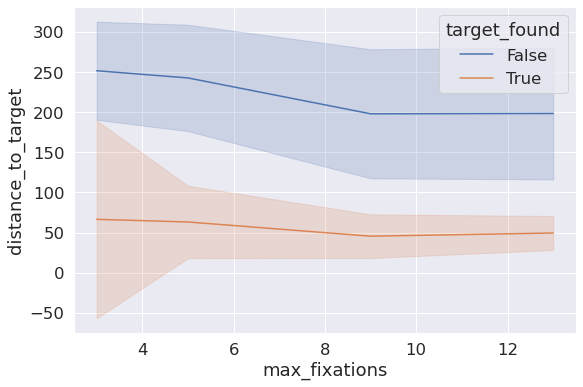

In [110]:
plot_column_max_fix_tf(responses_data, column_plot='distance_to_target')

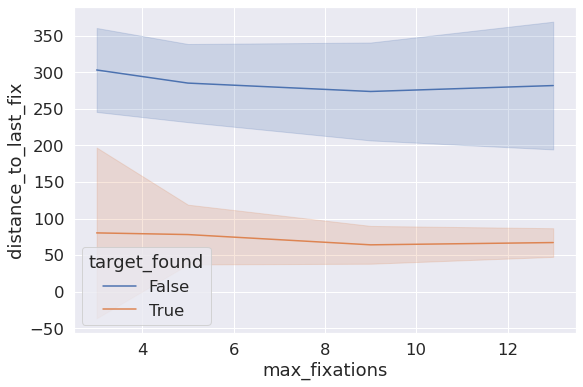

In [111]:
plot_column_max_fix_tf(responses_data, column_plot='distance_to_last_fix')

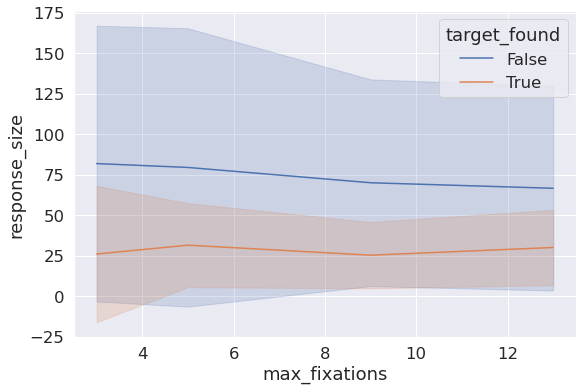

In [112]:
plot_column_max_fix_tf(responses_data, column_plot='response_size')

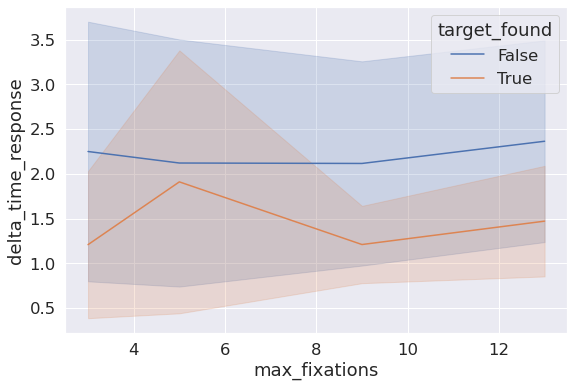

In [113]:
plot_column_max_fix_tf(responses_data, column_plot='delta_time_response')

## Gaussian mixture

GaussianMixture(n_components=2, random_state=0)

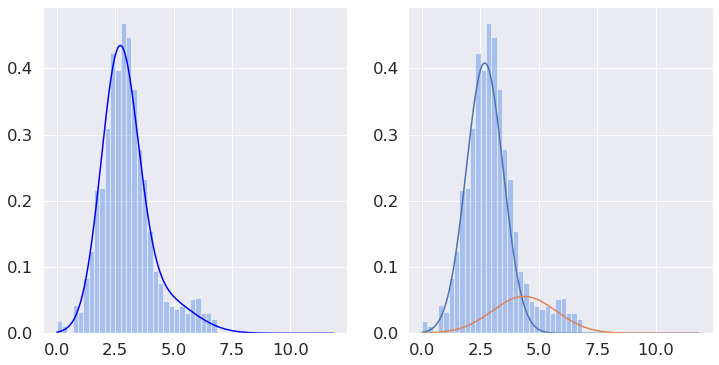

In [131]:
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

def fit_gaussian_mixture(df, col, n_components=2):
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    # filter out the outliers if any    
    X = df.loc[:,col]
    X = X[X != -np.inf]
    X = X.to_numpy().reshape(-1,1)
    gmm.fit(X)

    # plot the data and the mixture of gaussians
    x = np.linspace(np.min(X), np.max(X)+5, len(X)).reshape(-1,1)
    y = np.exp(gmm.score_samples(x))
    _, ax = plt.subplots(1,2, figsize=(12,6)) 
    ax[0].plot(x,y, color='blue')
    ax[0].hist(X, density=True, bins=30,alpha=0.5, color='cornflowerblue');
    val, bins, _ = ax[1].hist(X, bins=30, density=True, alpha=0.5, color='cornflowerblue')
    #area = sum(np.diff(bins)*val)  +  sum(np.diff(bins)*val)
    for i in range(n_components):
        mean_i = gmm.means_[i][0]
        std_i = np.sqrt(gmm.covariances_[i][0])[0]
        weight_i = gmm.weights_[i]
        y = norm.pdf(x, mean_i, std_i)*weight_i
        ax[1].plot(x,y)

    return gmm

fit_gaussian_mixture(responses_data[~(responses_data.target_found)], col = 'distance_to_target_log' )
#fit_gaussian_mixture(responses_data[responses_data.target_found], col = 'distance_to_target_log' )

## Duración de fijaciones

## Area cubierta por el scanpath?